# Prep

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    classification_report, accuracy_score, roc_auc_score, confusion_matrix
)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree # Import necessary libraries

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # Ignore warnings

In [10]:
file_path = r"C:\Users\eoinj\OneDrive\Documents\GitHub\Retail-Company-Analysis\Retail_Company_Dataset.xlsx"
excel_data = pd.ExcelFile(file_path) # Establish file path

In [11]:
print(excel_data.sheet_names) # Print sheet names for separation

['Definitions', 'Cost', 'Value Info', 'Demographic Info']


In [12]:
Definitions = "Definitions" 
Cost = "Cost"
Value_Info = "Value Info"
Demographic_Info = "Demographic Info"

In [13]:
df_Definitions = excel_data.parse("Definitions")
df_Cost = excel_data.parse("Cost")
df_Value_Info = excel_data.parse("Value Info")
df_Demographic_Info = excel_data.parse("Demographic Info") # Establish separate data frames

# Initial Charactarization

In [15]:
print("\nCost Sheet:")
print(df_Cost.head()) # print sheet structure


Cost Sheet:
       Month   Paid Search     Affiliates
0 2013-01-01  41545.840123   14421.323206
1 2013-02-01  52712.484180   40213.295929
2 2013-03-01  87967.719067  141631.313930


In [16]:
print("\nValue Info Sheet:")
print(df_Value_Info.head())


Value Info Sheet:
   Customer ID  1st Order Profit  Subsequent Order Profit  \
0            1          8.634899                 4.742417   
1            2          8.994167                63.582591   
2            3         15.040262                57.275498   
3            4         14.493356                 0.000000   
4            5         20.339551                68.094148   

   Subsequent Orders Count  Total value of all promotions  
0                        1                       6.051063  
1                        7                       7.563595  
2                        6                       0.000000  
3                        0                       0.000000  
4                        8                      13.172014  


In [17]:
print("\nDemographic Info Sheet:")
print(df_Demographic_Info.head())


Demographic Info Sheet:
   Customer ID Title Date Of Birth Address City Contact Allowed  \
0            1    Mr    1972-07-07     Malahide               Y   
1            2    Mr    1985-11-13       Dublin               Y   
2            3    Mr    1989-07-31       Dublin               Y   
3            4    Mr    1985-07-01       Dublin               N   
4            5    Mr    1993-03-08     Limerick               Y   

    Registration Date Source of Customer  
0 2013-01-13 00:23:00     Organic Search  
1 2013-01-29 00:30:00         Affiliates  
2 2012-12-26 01:09:00        Paid Social  
3 2013-01-30 01:19:00         Affiliates  
4 2013-01-13 01:58:00        Paid Search  


In [18]:
print("Cost")
print(df_Cost.info()) # print data types

Cost
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        3 non-null      datetime64[ns]
 1   Paid Search  3 non-null      float64       
 2   Affiliates   3 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 204.0 bytes
None


In [19]:
print("Value Info")
print(df_Value_Info.info())

Value Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30591 entries, 0 to 30590
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    30591 non-null  int64  
 1   1st Order Profit               30591 non-null  float64
 2   Subsequent Order Profit        30591 non-null  float64
 3   Subsequent Orders Count        30591 non-null  int64  
 4   Total value of all promotions  30591 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.2 MB
None


In [20]:
print("Demographic Info")
print(df_Demographic_Info.info())

Demographic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31441 entries, 0 to 31440
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         31441 non-null  int64         
 1   Title               27363 non-null  object        
 2   Date Of Birth       31441 non-null  datetime64[ns]
 3   Address City        31441 non-null  object        
 4   Contact Allowed     31441 non-null  object        
 5   Registration Date   31441 non-null  datetime64[ns]
 6   Source of Customer  31441 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB
None


In [21]:
print("\nCost Summary:")
print(df_Cost.describe())

print("\nValue Info Summary:")
print(df_Value_Info.describe())

print("\nDemographic Info Summary:")
print(df_Demographic_Info.describe()) # print statistics breakdown


Cost Summary:
                     Month   Paid Search     Affiliates
count                    3      3.000000       3.000000
mean   2013-01-31 00:00:00  60742.014457   65421.977688
min    2013-01-01 00:00:00  41545.840123   14421.323206
25%    2013-01-16 12:00:00  47129.162152   27317.309568
50%    2013-02-01 00:00:00  52712.484180   40213.295929
75%    2013-02-15 00:00:00  70340.101623   90922.304929
max    2013-03-01 00:00:00  87967.719067  141631.313930
std                    NaN  24230.202816   67247.332006

Value Info Summary:
        Customer ID  1st Order Profit  Subsequent Order Profit  \
count  30591.000000      30591.000000             30591.000000   
mean   15721.372201         10.682450                37.440746   
std     9076.322758          7.151719                47.907025   
min        1.000000          0.792179                 0.000000   
25%     7861.500000          5.065074                 0.000000   
50%    15722.000000          9.534523                21.114703  

In [22]:
print("\nMissing Values in Cost:")
print(df_Cost.isnull().sum())

print("\nMissing Values in Value Info:")
print(df_Value_Info.isnull().sum())

print("\nMissing Values in Demographic Info:")
print(df_Demographic_Info.isnull().sum()) # print missing values


Missing Values in Cost:
Month          0
Paid Search    0
Affiliates     0
dtype: int64

Missing Values in Value Info:
Customer ID                      0
1st Order Profit                 0
Subsequent Order Profit          0
Subsequent Orders Count          0
Total value of all promotions    0
dtype: int64

Missing Values in Demographic Info:
Customer ID              0
Title                 4078
Date Of Birth            0
Address City             0
Contact Allowed          0
Registration Date        0
Source of Customer       0
dtype: int64


In [23]:
print("\nUnique Values in Cost:")
for col in df_Cost.select_dtypes(include='object').columns:
    print(f"{col}: {df_Cost[col].unique()}")

print("\nUnique Values in Value Info:")
for col in df_Value_Info.select_dtypes(include='object').columns:
    print(f"{col}: {df_Value_Info[col].unique()}")

print("\nUnique Values in Demographic Info:")
for col in df_Demographic_Info.select_dtypes(include='object').columns:
    print(f"{col}: {df_Demographic_Info[col].unique()}") # print unique values


Unique Values in Cost:

Unique Values in Value Info:

Unique Values in Demographic Info:
Title: ['Mr' 'Mrs' 'Ms' nan 'Miss']
Address City: ['Malahide' 'Dublin' 'Limerick' 'Dungarvan' 'Clonmel' 'Newbridge' 'Galway'
 'Navan' 'Tullamore' 'Bray' 'Cork' 'Mullingar' 'Kildare' 'Kilkenny'
 'Ennis' 'Cavan' 'Tralee' 'Lucan' 'Clondalkin' 'Dundalk' 'Greystones'
 'Tallaght' 'Waterford' 'Portlaoise' 'Ashbourne' 'Naas' 'Wexford'
 'Maynooth' 'Leixlip' 'Ballinasloe' 'Castlebar' 'Rathfarnham' 'Swords'
 'Kells' 'Athlone' 'Mallow' 'Gorey' 'Blackrock' 'Nenagh' 'Ballina' 'Sligo'
 'Enniscorthy' 'Carlow' 'Killarney' 'Letterkenny' 'Drogheda' 'Longford'
 'Athy' 'Balbriggan' 'Celbridge']
Contact Allowed: ['Y' 'N']
Source of Customer: ['Organic Search' 'Affiliates' 'Paid Social' 'Paid Search' 'Direct']


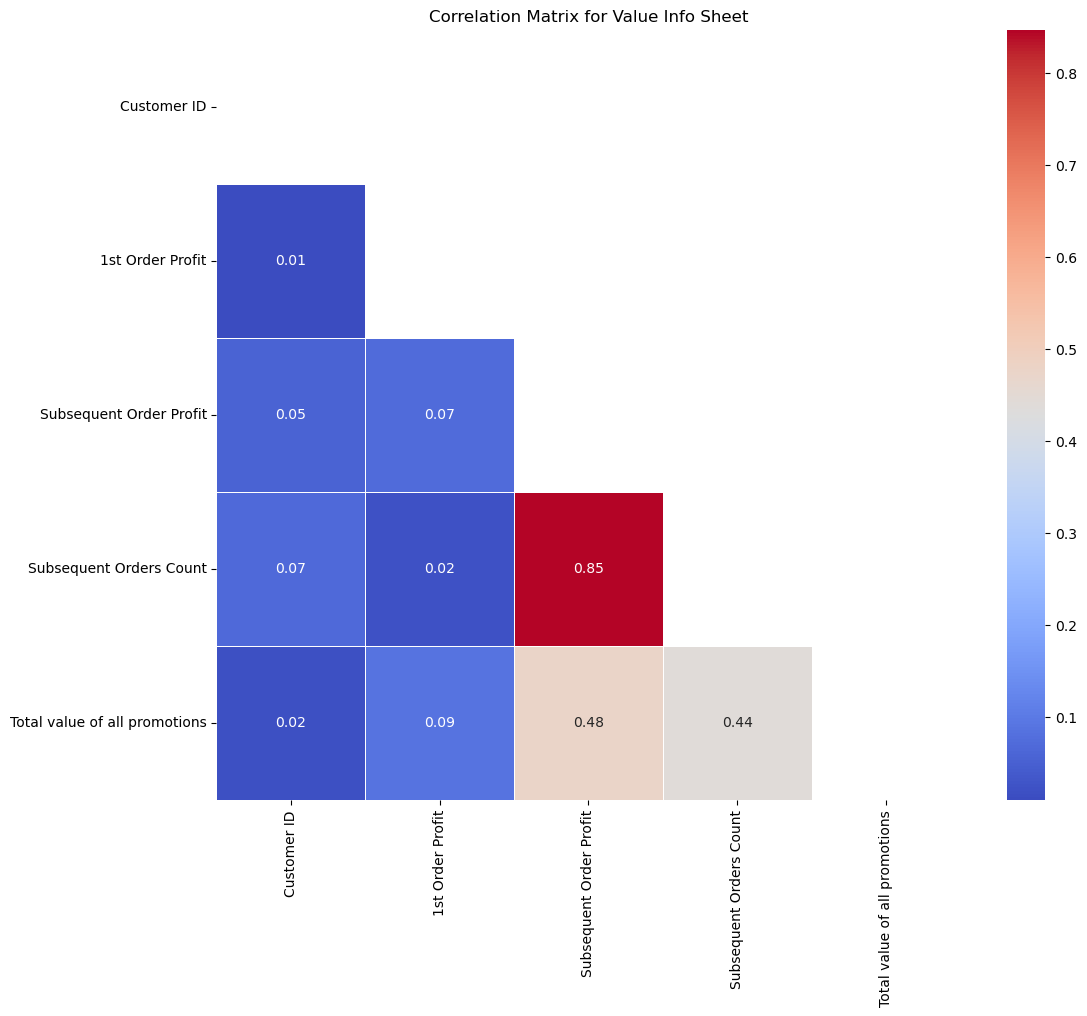

In [24]:
numerical_value_info = df_Value_Info.select_dtypes(include='number')

correlation_matrix_value_info = numerical_value_info.corr()

mask = np.triu(np.ones_like(correlation_matrix_value_info, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_value_info, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, linewidths=0.5)
plt.title("Correlation Matrix for Value Info Sheet")
plt.show() # examine feature correlation in value info sheet 

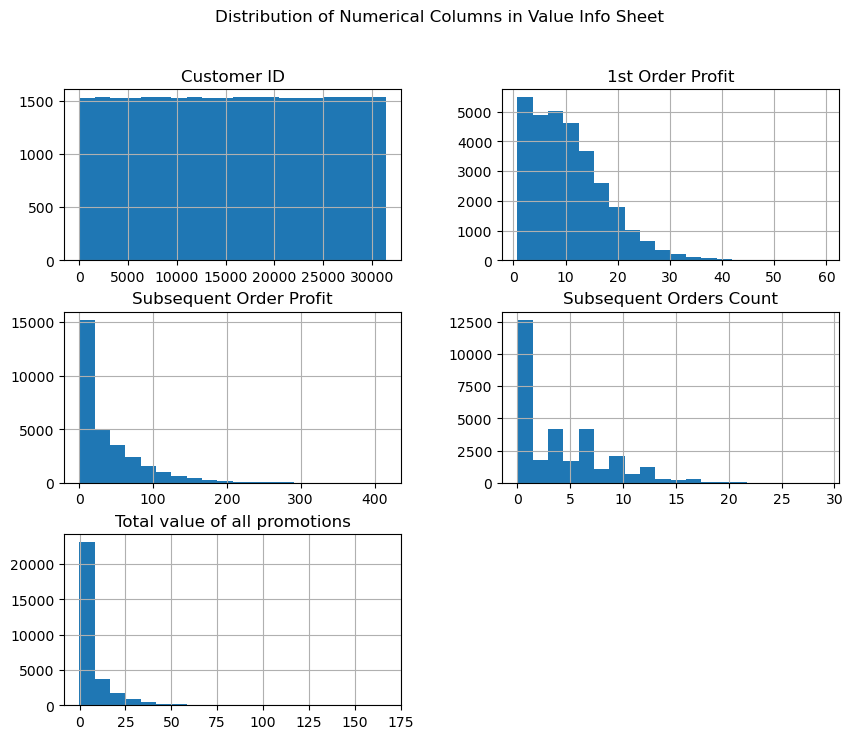

In [25]:
df_Value_Info.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Numerical Columns in Value Info Sheet")
plt.show() # examine distribution in value info

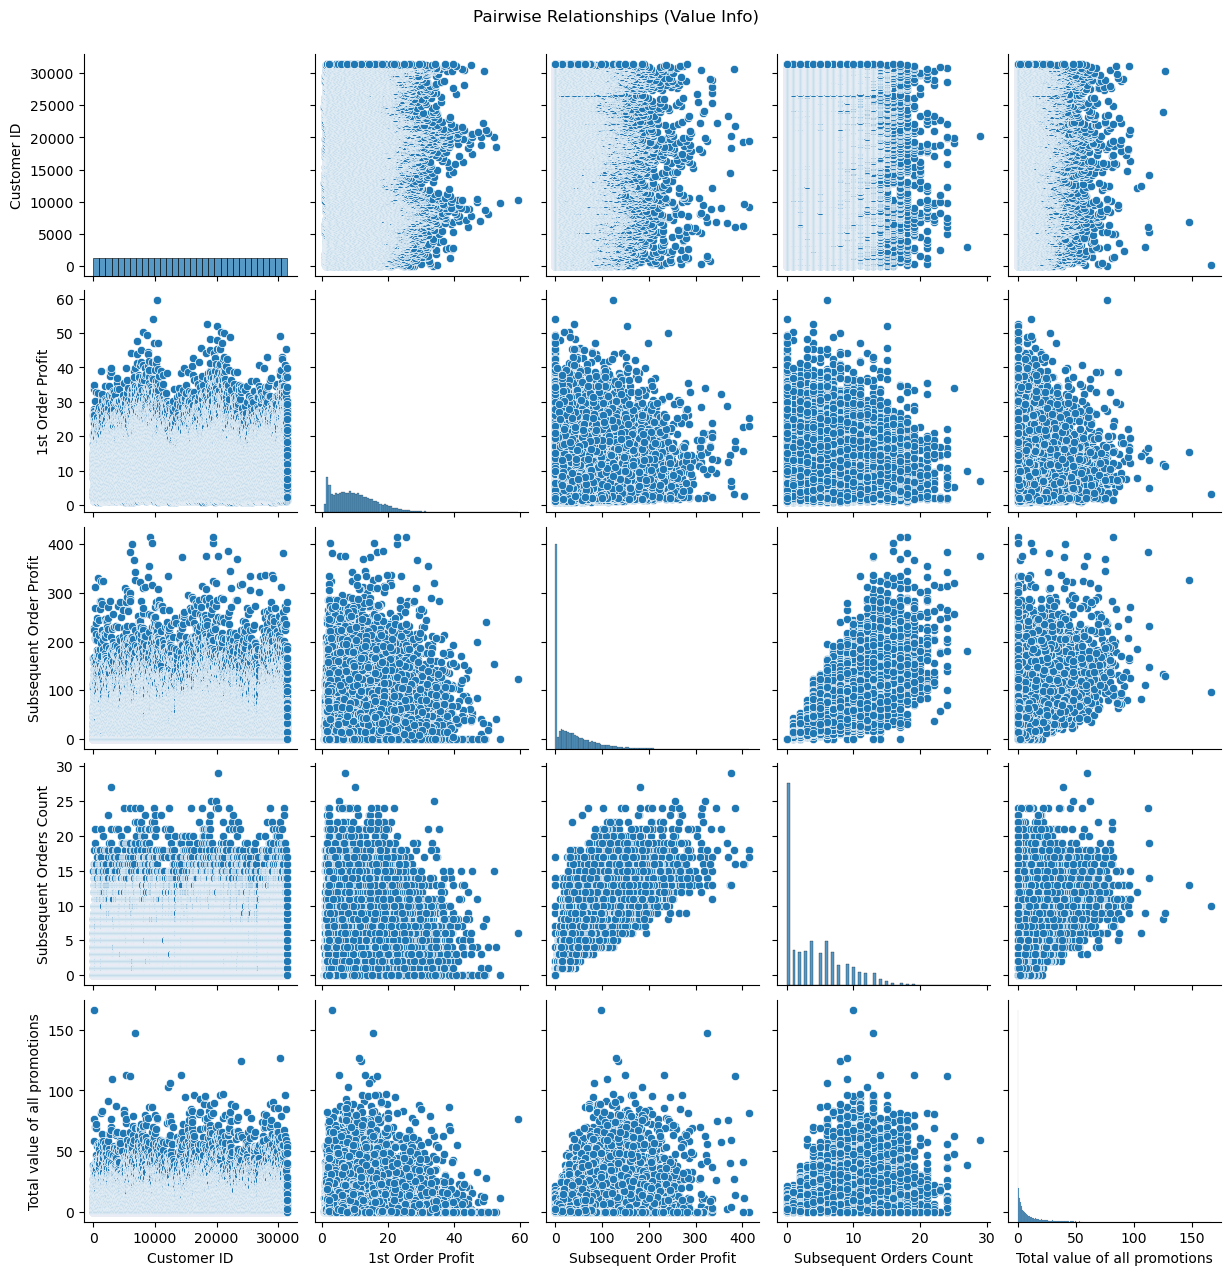

In [26]:
sns.pairplot(numerical_value_info)
plt.suptitle("Pairwise Relationships (Value Info)", y=1.02)
plt.show() # examine feature relationships

In [27]:
print("Columns in Value Info Sheet:")
print(df_Value_Info.columns) # print columns for grouping

Columns in Value Info Sheet:
Index(['Customer ID', '1st Order Profit', 'Subsequent Order Profit',
       'Subsequent Orders Count', 'Total value of all promotions'],
      dtype='object')


In [28]:
def bin_and_group_data(df, column_name, bins, labels, new_col_name):

    if column_name in df.columns:
        df[new_col_name] = pd.cut(df[column_name], bins=bins, labels=labels)
        grouped_stats = df.groupby(new_col_name).mean()
        print(f"\nGrouped Statistics by {new_col_name}:")
        print(grouped_stats)
        return grouped_stats
    else:
        print(f"Column {column_name} not found in the DataFrame.")
        return None # establish group bins for subsequent order count (low-high engagement)

In [29]:
if 'Subsequent Orders Count' in df_Value_Info.columns:
    bins_subsequent_orders = [-float('inf'), 1, 5, float('inf')]
    labels_subsequent_orders = ["Low", "Medium", "High"]
    df_Value_Info["Subsequent_Orders_Bins"] = pd.cut(
        df_Value_Info["Subsequent Orders Count"], bins=bins_subsequent_orders, labels=labels_subsequent_orders
    )

    numerical_columns = df_Value_Info.select_dtypes(include='number').columns
    grouped_stats_subsequent = df_Value_Info.groupby("Subsequent_Orders_Bins")[numerical_columns].mean()

    print("\nGrouped Statistics by Subsequent Orders Count Bins:")
    print(grouped_stats_subsequent) # examine bins contents


Grouped Statistics by Subsequent Orders Count Bins:
                         Customer ID  1st Order Profit  \
Subsequent_Orders_Bins                                   
Low                     14856.681829         10.579747   
Medium                  16199.467909         10.560815   
High                    16426.815991         10.897820   

                        Subsequent Order Profit  Subsequent Orders Count  \
Subsequent_Orders_Bins                                                     
Low                                    1.642039                 0.150305   
Medium                                31.955304                 3.522772   
High                                  85.289458                 9.227955   

                        Total value of all promotions  
Subsequent_Orders_Bins                                 
Low                                          1.768443  
Medium                                       6.298330  
High                                        12.3917

In [30]:
if 'Total value of all promotions' in df_Value_Info.columns:
    bins_promotions = [-float('inf'), 5, 20, float('inf')]
    labels_promotions = ["Low Spend", "Moderate Spend", "High Spend"]
    df_Value_Info["Promotion_Bins"] = pd.cut(
        df_Value_Info["Total value of all promotions"], bins=bins_promotions, labels=labels_promotions
    )

    numerical_columns = df_Value_Info.select_dtypes(include='number').columns
    grouped_stats_promotions = df_Value_Info.groupby("Promotion_Bins")[numerical_columns].mean()

    print("\nGrouped Statistics by Total Value of All Promotions Bins:")
    print(grouped_stats_promotions) # examine promotional spending bins


Grouped Statistics by Total Value of All Promotions Bins:
                 Customer ID  1st Order Profit  Subsequent Order Profit  \
Promotion_Bins                                                            
Low Spend       15546.756878         10.105673                25.066051   
Moderate Spend  16124.634561         11.849014                47.204909   
High Spend      15898.984578         11.692423                98.159856   

                Subsequent Orders Count  Total value of all promotions  
Promotion_Bins                                                          
Low Spend                      2.840756                       1.029737  
Moderate Spend                 5.369859                      10.500176  
High Spend                     9.109664                      33.984957  


In [31]:
if 'Subsequent Order Profit' in df_Value_Info.columns:
   
    bins_subsequent_profits = [-float('inf'), 20, 50, float('inf')]
    labels_subsequent_profits = ["Low Profit", "Moderate Profit", "High Profit"]
    
    df_Value_Info["Profit_Bins"] = pd.cut(
        df_Value_Info["Subsequent Order Profit"], bins=bins_subsequent_profits, labels=labels_subsequent_profits
    )
    
    numerical_columns = df_Value_Info.select_dtypes(include='number').columns
    
    grouped_stats_profits = df_Value_Info.groupby("Profit_Bins")[numerical_columns].mean()
    
    print("\nGrouped Statistics by Subsequent Order Profit Bins:")
    print(grouped_stats_profits) # examine subsequent order profit bins


Grouped Statistics by Subsequent Order Profit Bins:
                  Customer ID  1st Order Profit  Subsequent Order Profit  \
Profit_Bins                                                                
Low Profit       15069.532365         10.444259                 3.442135   
Moderate Profit  16306.960813         10.388987                34.029255   
High Profit      16380.685299         11.314707                98.014521   

                 Subsequent Orders Count  Total value of all promotions  
Profit_Bins                                                              
Low Profit                      0.691221                       2.150467  
Moderate Profit                 4.942693                       6.676321  
High Profit                     9.106339                      13.722201  


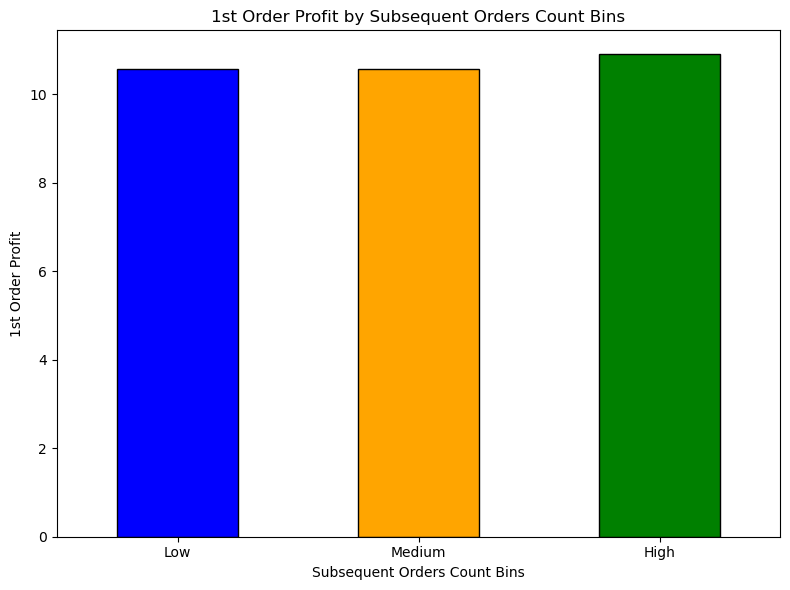

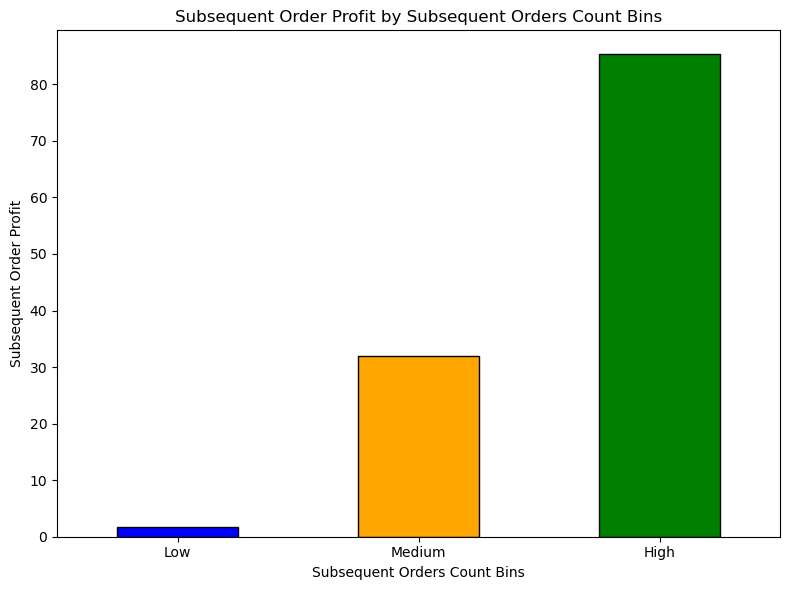

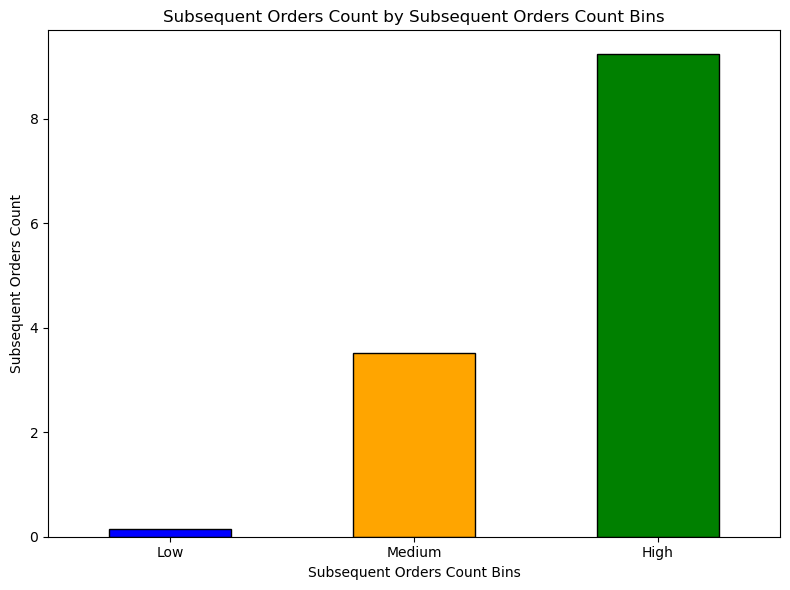

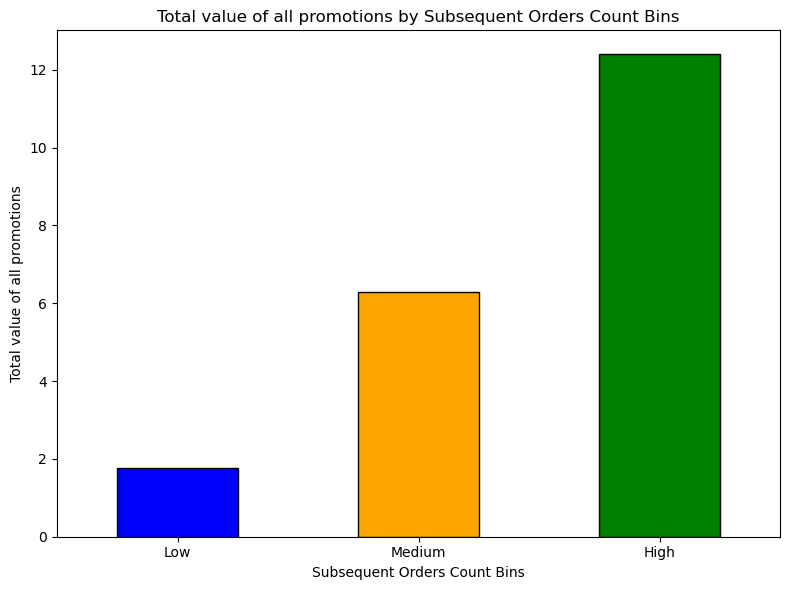

In [32]:
metrics = [
    "1st Order Profit", 
    "Subsequent Order Profit", 
    "Subsequent Orders Count", 
    "Total value of all promotions"
]

for metric in metrics:
    plt.figure(figsize=(8, 6))
    grouped_stats_subsequent[metric].plot(kind="bar", color=["blue", "orange", "green"], edgecolor="black")
    plt.title(f"{metric} by Subsequent Orders Count Bins")
    plt.ylabel(metric)
    plt.xlabel("Subsequent Orders Count Bins")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show() # visualize bin differences

<Axes: title={'center': 'Subsequent Order Profit by Promotion Bins'}, xlabel='Promotion_Bins'>

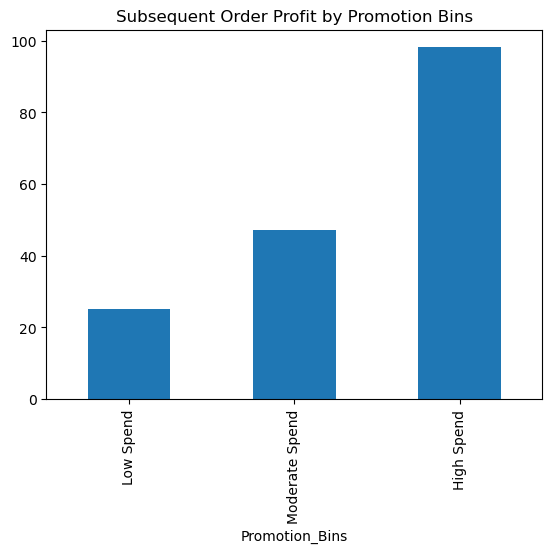

In [33]:
grouped_stats_promotions["Subsequent Order Profit"].plot(kind="bar", title="Subsequent Order Profit by Promotion Bins") # visualize subsequent order profit bins

In [34]:
print("Columns in df_Demographic_Info:")
print(df_Demographic_Info.columns) # print columns for demographics info sheet

Columns in df_Demographic_Info:
Index(['Customer ID', 'Title', 'Date Of Birth', 'Address City',
       'Contact Allowed', 'Registration Date', 'Source of Customer'],
      dtype='object')



Number of Customers by Source:
Source of Customer
Affiliates         3868
Direct            11252
Organic Search     8392
Paid Search        6518
Paid Social        1411
dtype: int64


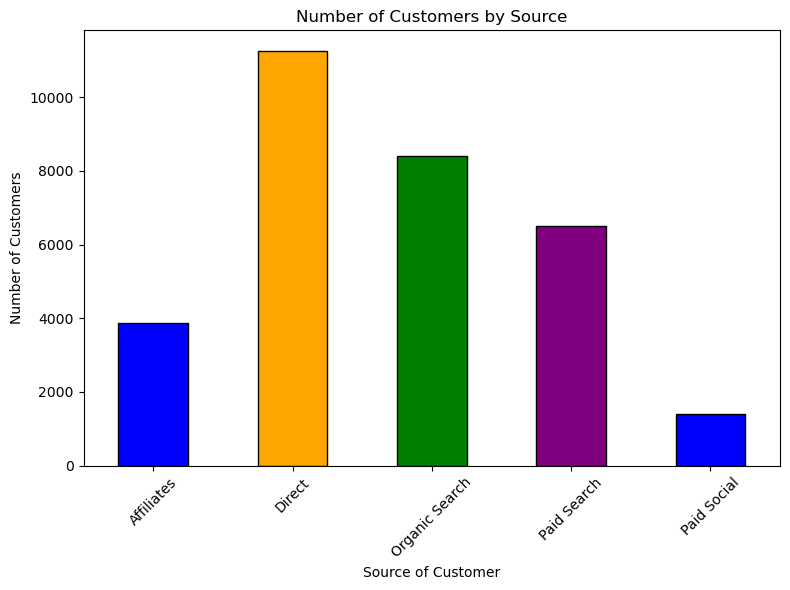

In [35]:
customer_source_counts = df_Demographic_Info.groupby('Source of Customer').size()

print("\nNumber of Customers by Source:")
print(customer_source_counts)

customer_source_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange', 'green', 'purple'], edgecolor='black')
plt.title("Number of Customers by Source")
plt.xlabel("Source of Customer")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # examine and visualize customer numbers by source

In [36]:
print("Columns in df_Cost:", df_Cost.columns) # examine columns in cost sheet

Columns in df_Cost: Index(['Month', 'Paid Search', 'Affiliates'], dtype='object')


In [37]:
customer_source_counts = customer_source_counts.reset_index()
customer_source_counts.columns = ['Source of Customer', 'Customer Count']

source_mapping = pd.DataFrame({
    'Source of Customer': ['Paid Search', 'Affiliates'],
    'Cost Type': ['Paid Search', 'Affiliates']
})

df_Cost_long = df_Cost.melt(id_vars='Month', var_name='Cost Type', value_name='Spending')

df_Cost_long = df_Cost_long.merge(source_mapping, on='Cost Type', how='inner')

merged_df = df_Cost_long.merge(customer_source_counts, on='Source of Customer', how='inner')

print("\nMerged DataFrame:")
print(merged_df.head()) # merge cost sheet with demographic info to analyze relationship between spending and customer source count


Merged DataFrame:
       Month    Cost Type      Spending Source of Customer  Customer Count
0 2013-01-01  Paid Search  41545.840123        Paid Search            6518
1 2013-02-01  Paid Search  52712.484180        Paid Search            6518
2 2013-03-01  Paid Search  87967.719067        Paid Search            6518
3 2013-01-01   Affiliates  14421.323206         Affiliates            3868
4 2013-02-01   Affiliates  40213.295929         Affiliates            3868



Correlation Between Spending and Customer Count:
                Spending  Customer Count
Spending         1.00000        -0.05661
Customer Count  -0.05661         1.00000


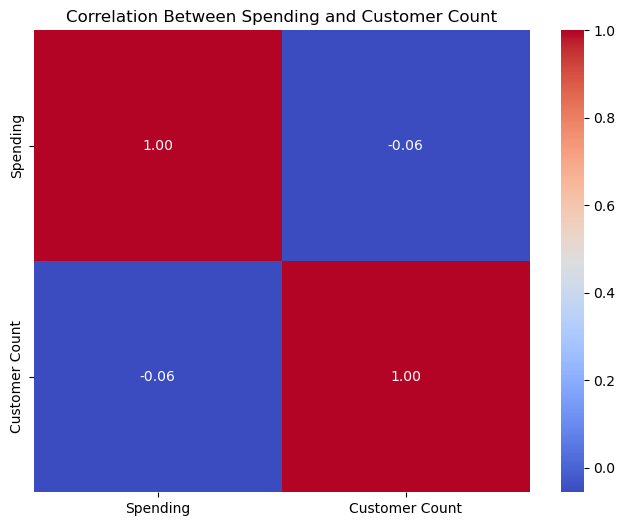

In [38]:
correlation_matrix = merged_df[['Spending', 'Customer Count']].corr()

print("\nCorrelation Between Spending and Customer Count:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Spending and Customer Count")
plt.show() # corelation between spending and customer count

In [39]:
print("Columns in df_Demographic_Info:")
print(df_Demographic_Info.columns) # print demo info columns

Columns in df_Demographic_Info:
Index(['Customer ID', 'Title', 'Date Of Birth', 'Address City',
       'Contact Allowed', 'Registration Date', 'Source of Customer'],
      dtype='object')


In [40]:
from datetime import datetime

if 'Date Of Birth' in df_Demographic_Info.columns:
    current_year = datetime.now().year
    df_Demographic_Info['Age'] = current_year - pd.to_datetime(df_Demographic_Info['Date Of Birth']).dt.year # convert age for analysis

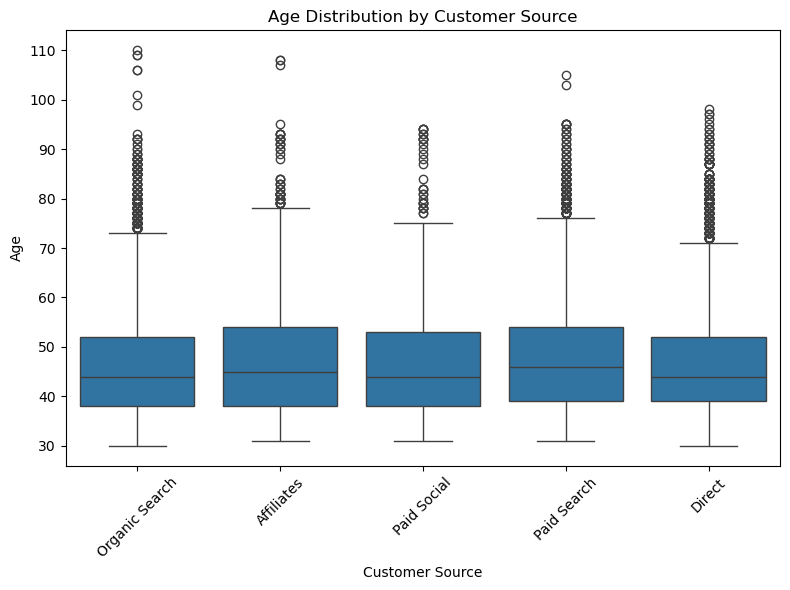

In [41]:
for col in ['Age']:  
    if col in df_Demographic_Info.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_Demographic_Info, x='Source of Customer', y=col)
        plt.title(f"{col} Distribution by Customer Source")
        plt.xlabel("Customer Source")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        filename = f"{col}_Distribution_by_Customer_Source.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show() # examine age distribution by customer source

In [42]:
gender_mapping = {
    'Mr': 'Male',
    'Ms': 'Female',
    'Miss': 'Female'
}

df_Demographic_Info['Gender'] = df_Demographic_Info['Title'].map(gender_mapping)

print("Gender Distribution:")
print(df_Demographic_Info['Gender'].value_counts()) # examine gender distribution in customers

Gender Distribution:
Gender
Male      19981
Female     5052
Name: count, dtype: int64


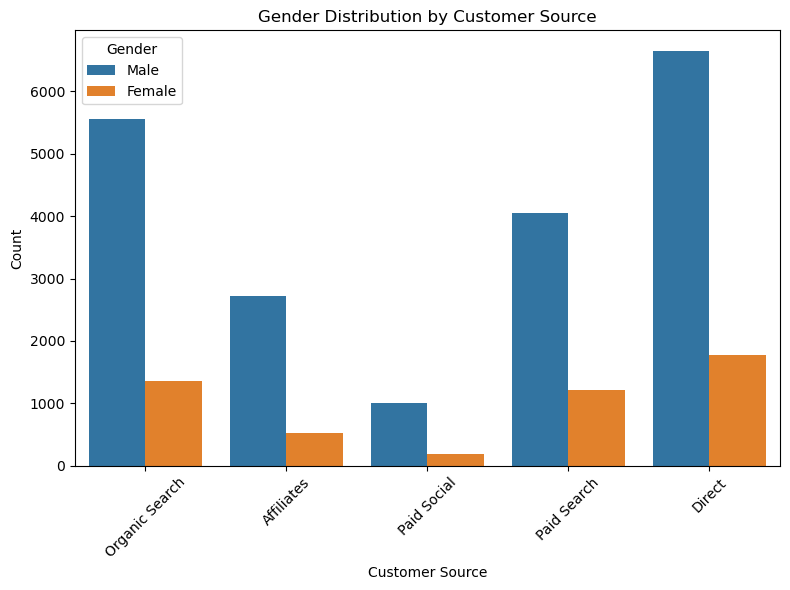

In [43]:
if 'Gender' in df_Demographic_Info.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_Demographic_Info, x='Source of Customer', hue='Gender')
    plt.title("Gender Distribution by Customer Source")
    plt.xlabel("Customer Source")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.savefig("Gender_Distribution_by_Customer_Source.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.show() # visualize gender distribution by customer source

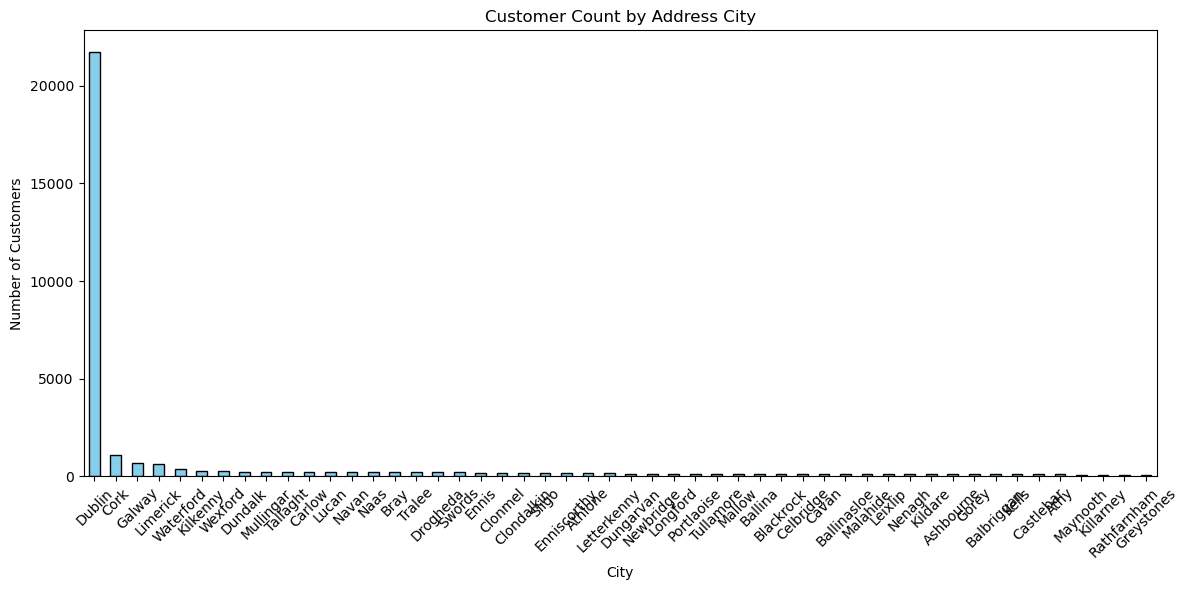

In [44]:
city_counts = df_Demographic_Info['Address City'].value_counts()

plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Customer Count by Address City")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
filename = "Customer_Source_BarChart"
plt.savefig(filename, dpi=300, bbox_inches='tight') 
plt.show() # visualize customer source by city or town

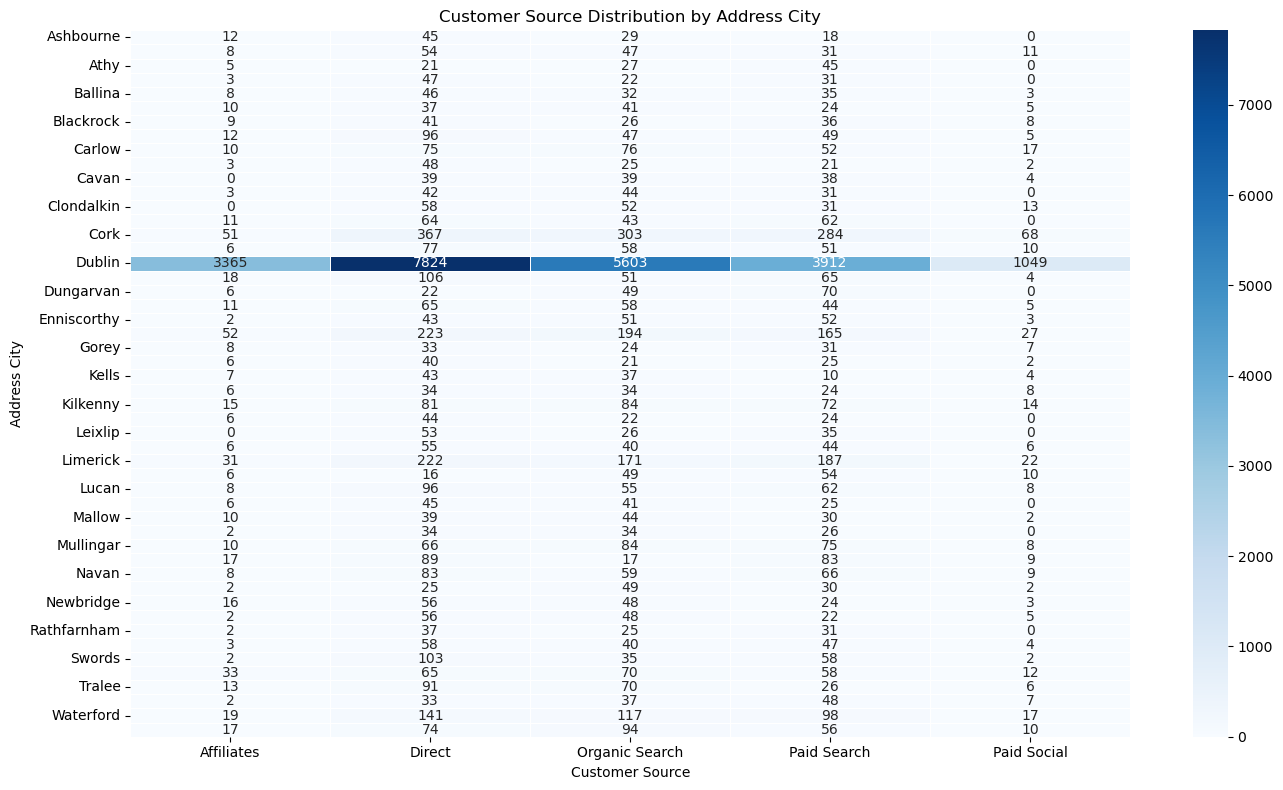

In [45]:
city_source_counts = df_Demographic_Info.groupby(['Address City', 'Source of Customer']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(city_source_counts, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Customer Source Distribution by Address City")
plt.xlabel("Customer Source")
plt.ylabel("Address City")
plt.tight_layout()
filename = "Customer_Source_Heatmap"
plt.savefig(filename, dpi=300, bbox_inches='tight') 
plt.show() # further visualization of customer location

In [46]:
df_clean = df_Value_Info.dropna()

In [47]:
bins = [-float('inf'), 1, 5, 10, float('inf')]
labels = ['No Engagement', 'Low Engagement', 'Moderate Engagement', 'High Engagement']

df_clean['Order_Segment'] = pd.cut(df_clean['Subsequent Orders Count'], bins=bins, labels=labels)

print("\nOrder_Segment column created:")
print(df_clean['Order_Segment'].value_counts()) # create engagement bins 


Order_Segment column created:
Order_Segment
No Engagement          12641
Low Engagement          7619
Moderate Engagement     7337
High Engagement         2994
Name: count, dtype: int64



Segment Analysis:
                      Customer ID  1st Order Profit  Subsequent Order Profit  \
Order_Segment                                                                  
No Engagement        14856.681829         10.579747                 1.642039   
Low Engagement       16199.467909         10.560815                31.955304   
Moderate Engagement  16360.396075         10.868318                69.540531   
High Engagement      16589.582498         10.970116               123.883270   

                     Subsequent Orders Count  Total value of all promotions  
Order_Segment                                                                
No Engagement                       0.150305                       1.768443  
Low Engagement                      3.522772                       6.298330  
Moderate Engagement                 7.532506                      10.881571  
High Engagement                    13.382766                      16.092481  


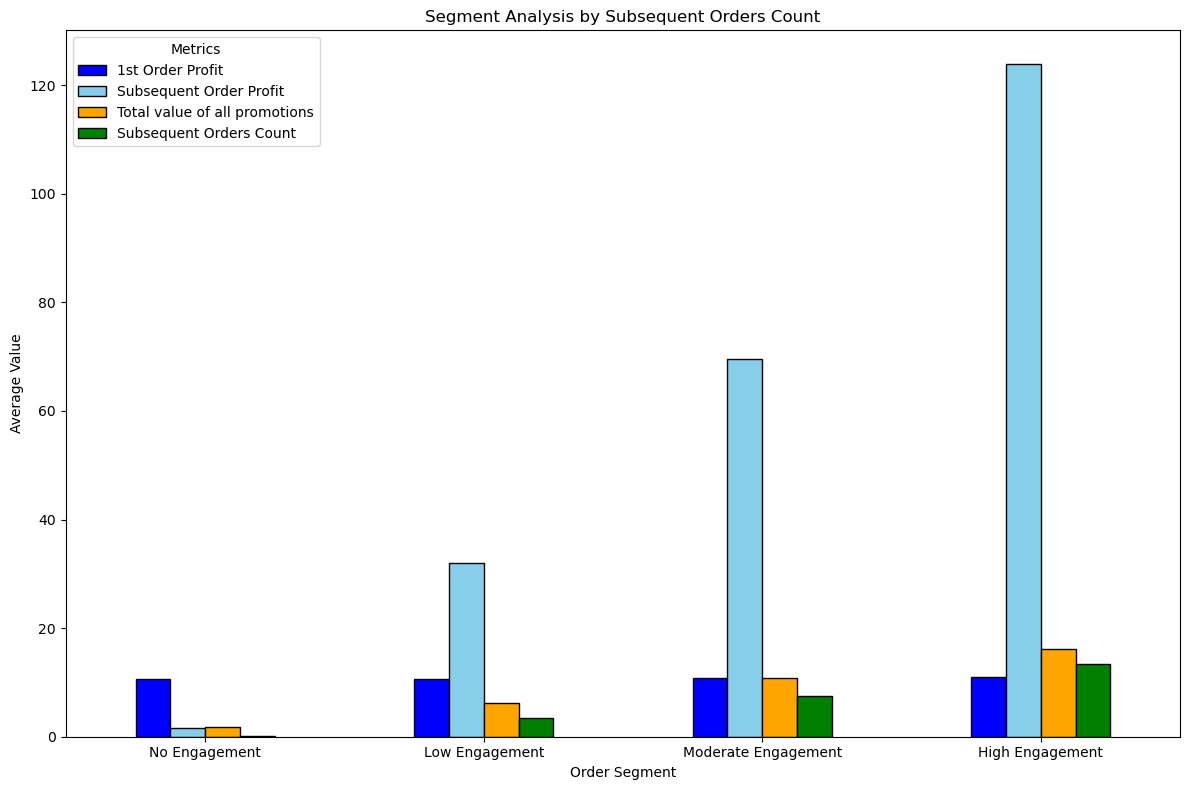

In [177]:
numerical_columns = df_clean.select_dtypes(include=['number']).columns

segment_analysis = df_clean.groupby('Order_Segment')[numerical_columns].mean()

print("\nSegment Analysis:")
print(segment_analysis)

segment_analysis[['1st Order Profit', 'Subsequent Order Profit', 'Total value of all promotions', 'Subsequent Orders Count']].plot(
    kind='bar',
    figsize=(12, 8),
    color=['blue', 'skyblue', 'orange', 'green'],
    edgecolor='black'
)
plt.title("Segment Analysis by Subsequent Orders Count")
plt.xlabel("Order Segment")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig("Segment_Analysis.png", dpi=300, bbox_inches='tight')
plt.show() # analyze value info sheet columns by engagement bins

# Model Testing

In [50]:
X = df_clean[['1st Order Profit', 'Total value of all promotions']]
y = df_clean['Subsequent Order Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred)) # testing linear regression model to predict subsequent order profit (poor performance)


Mean Squared Error: 1754.9620553534426
R^2 Score: 0.22888268533962575


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))  # test random forest model (poor performance)

Random Forest MSE: 2067.3372754679017
Random Forest R² Score: 0.0916273297800475


In [52]:
merged_df = df_Value_Info.merge(df_Demographic_Info, on='Customer ID', how='inner')

print(merged_df.info())
print(merged_df.head()) # examine merged value info and demo info sheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30591 entries, 0 to 30590
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer ID                    30591 non-null  int64         
 1   1st Order Profit               30591 non-null  float64       
 2   Subsequent Order Profit        30591 non-null  float64       
 3   Subsequent Orders Count        30591 non-null  int64         
 4   Total value of all promotions  30591 non-null  float64       
 5   Subsequent_Orders_Bins         30591 non-null  category      
 6   Promotion_Bins                 30591 non-null  category      
 7   Profit_Bins                    30591 non-null  category      
 8   Title                          26616 non-null  object        
 9   Date Of Birth                  30591 non-null  datetime64[ns]
 10  Address City                   30591 non-null  object        
 11  Contact Allowed

In [53]:
bins = [-float('inf'), 0, 5, 10, float('inf')]
labels = ['No Engagement', 'Low Engagement', 'Moderate Engagement', 'High Engagement']

merged_df['Engagement_Segment'] = pd.cut(
   merged_df['Subsequent Orders Count'], bins=bins, labels=labels
)

numerical_columns = merged_df.select_dtypes(include=['number']).columns

segment_analysis = merged_df.groupby('Engagement_Segment')[numerical_columns].mean()

print("\nSegment Analysis:")
print(segment_analysis) # segment analysis for merged df 


Segment Analysis:
                      Customer ID  1st Order Profit  Subsequent Order Profit  \
Engagement_Segment                                                             
No Engagement        14617.371474         10.577498                 0.000000   
Low Engagement       16201.478517         10.567132                27.757587   
Moderate Engagement  16360.396075         10.868318                69.540531   
High Engagement      16589.582498         10.970116               123.883270   

                     Subsequent Orders Count  Total value of all promotions  \
Engagement_Segment                                                            
No Engagement                       0.000000                       1.577360   
Low Engagement                      3.019225                       5.609774   
Moderate Engagement                 7.532506                      10.881571   
High Engagement                    13.382766                      16.092481   

                         

In [54]:
X_2 =merged_df[['1st Order Profit', 'Total value of all promotions']]
y_2 = pd.cut(merged_df['Subsequent Orders Count'], bins=bins, labels=labels).cat.codes

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42
)

rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2.fit(X_2_train, y_2_train)

y_2_pred = rf_model_2.predict(X_2_test)
print("\nClassification Report (Engagement Transition):")
print(classification_report(y_2_test, y_2_pred)) # examine model performance in predicting change in engagement levels (poor performance)


Classification Report (Engagement Transition):
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      2201
           1       0.39      0.39      0.39      1870
           2       0.35      0.31      0.33      1472
           3       0.22      0.18      0.19       576

    accuracy                           0.45      6119
   macro avg       0.39      0.39      0.39      6119
weighted avg       0.44      0.45      0.44      6119



In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_2, y_2)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts()) # testing smote for model improvement

Before SMOTE: Subsequent Order Profit
0.000000     10759
4.742417         1
56.489051        1
35.672265        1
19.673986        1
             ...  
24.803593        1
30.182760        1
18.686690        1
21.796631        1
62.600457        1
Name: count, Length: 19833, dtype: int64
After SMOTE: 1    10741
2    10741
0    10741
3    10741
Name: count, dtype: int64


In [56]:
rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2.fit(X_2_train, y_2_train)

y_2_pred = rf_model_2.predict(X_2_test)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report (New Training Data):")
print(classification_report(y_2_test, y_2_pred))

print("\nConfusion Matrix (New Training Data):")
print(confusion_matrix(y_2_test, y_2_pred)) # testing model with smote applied (model ineffective)


Classification Report (New Training Data):
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      2201
           1       0.39      0.39      0.39      1870
           2       0.35      0.31      0.33      1472
           3       0.22      0.18      0.19       576

    accuracy                           0.45      6119
   macro avg       0.39      0.39      0.39      6119
weighted avg       0.44      0.45      0.44      6119


Confusion Matrix (New Training Data):
[[1465  473  201   62]
 [ 566  737  434  133]
 [ 341  511  453  167]
 [ 104  159  212  101]]


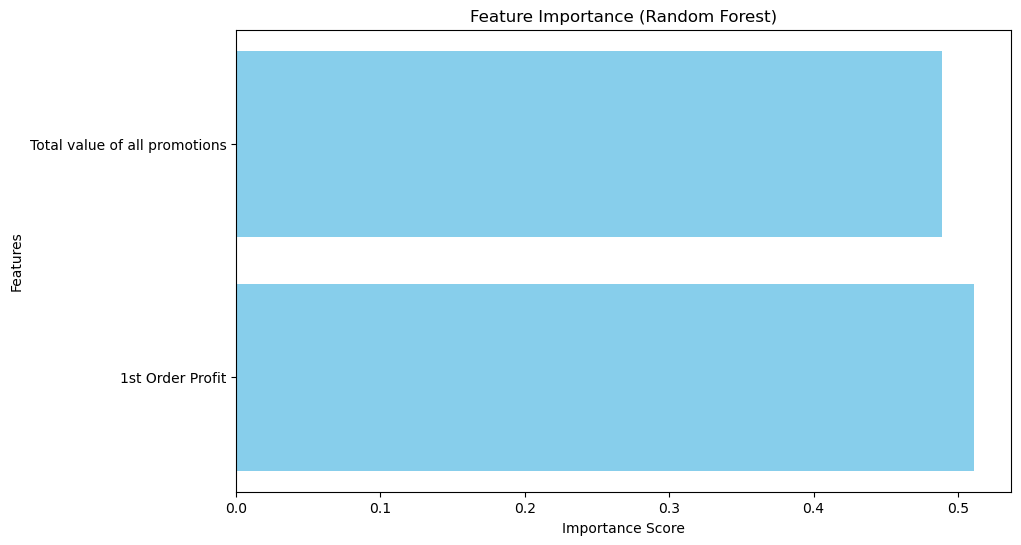

In [57]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show() # visualize feature importance in model 

In [58]:
features = df_Value_Info[['Subsequent Orders Count', 'Subsequent Order Profit', 'Total value of all promotions']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

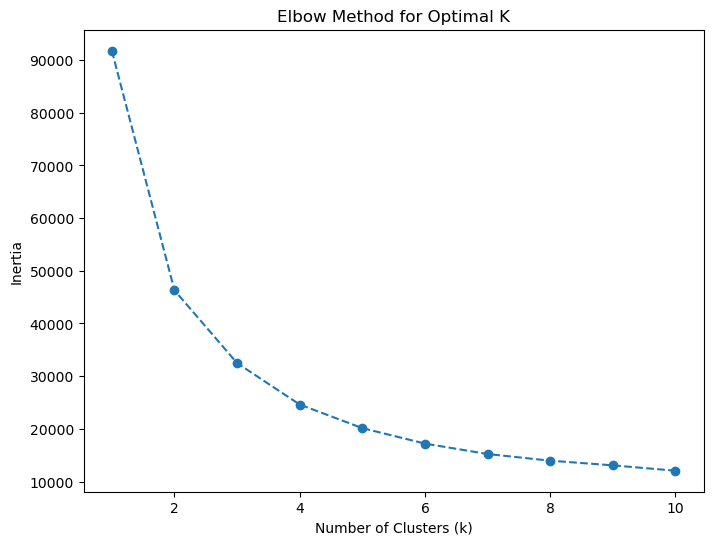

In [59]:
from sklearn.cluster import KMeans
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.savefig("elbow_method.png", dpi=300, bbox_inches='tight')
plt.show() # find optimal paramaters for k means clustering

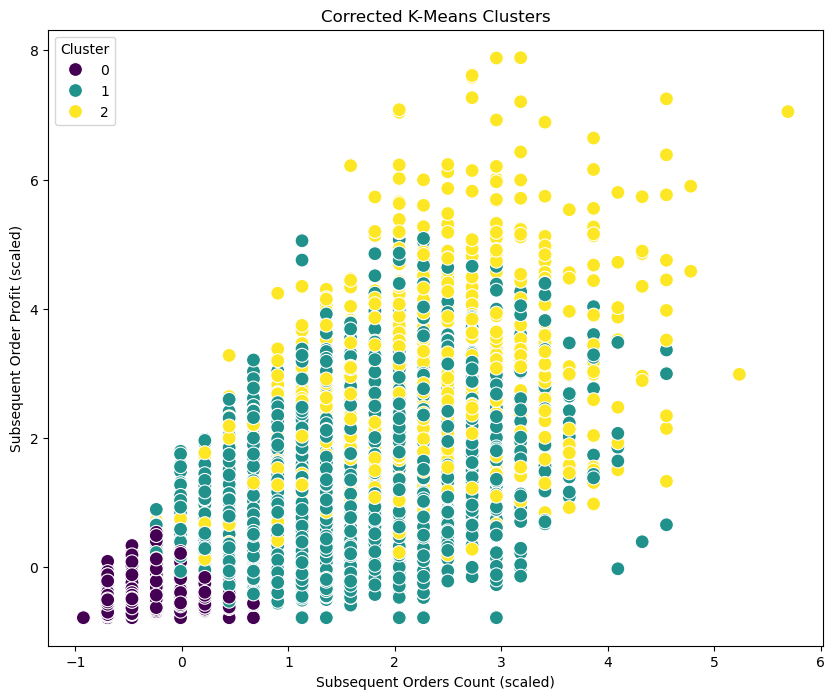

In [60]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

cluster_mapping = {0: 0, 1: 2, 2: 1}  
df_Value_Info['Engagement_Cluster'] = pd.Series(clusters).map(cluster_mapping)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], 
    hue=df_Value_Info['Engagement_Cluster'], palette='viridis', s=100
)
plt.title('Corrected K-Means Clusters')
plt.xlabel('Subsequent Orders Count (scaled)')
plt.ylabel('Subsequent Order Profit (scaled)')
plt.legend(title='Cluster')
plt.savefig("K-Means_Corrected_Cluster", dpi=300, bbox_inches='tight')
plt.show() # generate and visualize k-means clusters, ensuring correct labels

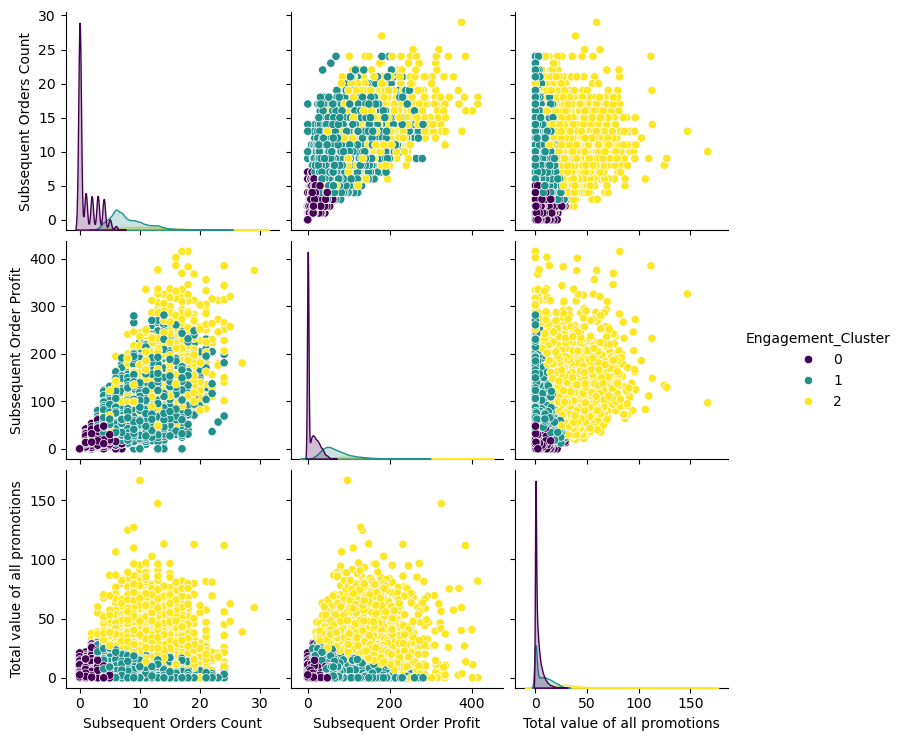

In [61]:
sns.pairplot(
    df_Value_Info,
    vars=['Subsequent Orders Count', 'Subsequent Order Profit', 'Total value of all promotions'],
    hue='Engagement_Cluster',
    palette='viridis'
)
plt.savefig("K-Means_Cluster_PairPlot", dpi=300, bbox_inches='tight')
plt.show() # examine feature relationship in k means clusters

In [62]:
df_Value_Info['Engagement_Cluster'] = kmeans.labels_

In [63]:
df_Value_Info['Engagement_Cluster'] = kmeans.labels_  

df_Value_Info['Next_Cluster'] = df_Value_Info['Engagement_Cluster'].shift(-1).fillna(method='ffill')

transition_data = df_Value_Info[['Customer ID', 'Engagement_Cluster', 'Next_Cluster', 
                                 'Subsequent Orders Count', 'Subsequent Order Profit', 
                                 'Total value of all promotions']].copy()
 
transition_data.rename(columns={'Engagement_Cluster': 'Current_Cluster'}, inplace=True) # create new column for engagement transition analysis

In [64]:
transition_data['Cluster_Label'] = kmeans.labels_
X_3 = transition_data[['Subsequent Order Profit', 'Subsequent Orders Count', 'Total value of all promotions', 'Cluster_Label']]  
y_3 = transition_data['Next_Cluster']  

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42, stratify=y_3)

rf_model_3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_3.fit(X_3_train, y_3_train)

y_3_pred = rf_model_3.predict(X_3_test)

print("Classification Report (with K-Means cluster as a feature):")
print(classification_report(y_3_test, y_3_pred))

print("Confusion Matrix (with K-Means cluster as a feature):")
print(confusion_matrix(y_3_test, y_3_pred))

transition_data.rename(columns={'Engagement_Cluster': 'Current_Cluster'}, inplace=True) # test model for predicting movement between engagement bins (model ineffective)

Classification Report (with K-Means cluster as a feature):
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.66      3697
         1.0       0.09      0.05      0.06       501
         2.0       0.35      0.29      0.32      1921

    accuracy                           0.52      6119
   macro avg       0.35      0.35      0.35      6119
weighted avg       0.49      0.52      0.50      6119

Confusion Matrix (with K-Means cluster as a feature):
[[2619  156  922]
 [ 337   24  140]
 [1279   80  562]]


In [65]:
X = transition_data[['Subsequent Order Profit', 'Subsequent Orders Count', 'Total value of all promotions', 'Cluster_Label']]
y = transition_data['Next_Cluster']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.85      0.71      3691
         1.0       0.10      0.00      0.01       506
         2.0       0.37      0.20      0.26      1922

    accuracy                           0.57      6119
   macro avg       0.36      0.35      0.33      6119
weighted avg       0.49      0.57      0.51      6119



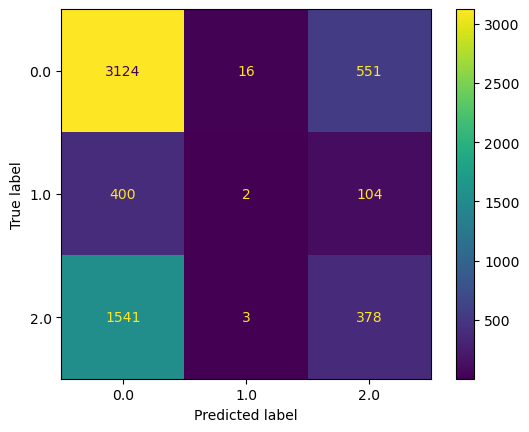

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)

y_pred = gnb_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show() # further model testing for engagement transition (ineffective)

In [69]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split # import necessary libraries for xgboost model

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'multi:softmax',  
    'num_class': len(set(y)),  
    'max_depth': 6,
    'eta': 0.3,
    'eval_metric': 'merror'
}

model = xgb.train(params, dtrain, num_boost_round=100)

y_pred = model.predict(dtest)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) # test xgboost model (ineffective)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.91      0.73      3691
         1.0       0.00      0.00      0.00       506
         2.0       0.34      0.10      0.15      1922

    accuracy                           0.58      6119
   macro avg       0.31      0.34      0.29      6119
weighted avg       0.47      0.58      0.49      6119

Confusion Matrix:
[[3358   14  319]
 [ 447    0   59]
 [1724    7  191]]


# Preprocessing

In [72]:
print(merged_df.head()) # examine merged df contents

   Customer ID  1st Order Profit  Subsequent Order Profit  \
0            1          8.634899                 4.742417   
1            2          8.994167                63.582591   
2            3         15.040262                57.275498   
3            4         14.493356                 0.000000   
4            5         20.339551                68.094148   

   Subsequent Orders Count  Total value of all promotions  \
0                        1                       6.051063   
1                        7                       7.563595   
2                        6                       0.000000   
3                        0                       0.000000   
4                        8                      13.172014   

  Subsequent_Orders_Bins  Promotion_Bins  Profit_Bins Title Date Of Birth  \
0                    Low  Moderate Spend   Low Profit    Mr    1972-07-07   
1                   High  Moderate Spend  High Profit    Mr    1985-11-13   
2                   High       Low 

In [73]:
from sklearn.preprocessing import OneHotEncoder

df_transformed = merged_df.copy()

bins_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df_transformed['Subsequent_Orders_Bins'] = df_transformed['Subsequent_Orders_Bins'].map(bins_mapping)
df_transformed['Promotion_Bins'] = df_transformed['Promotion_Bins'].map(bins_mapping)
df_transformed['Engagement_Segment'] = df_transformed['Engagement_Segment'].map({
    'No Engagement': 0, 'Low Engagement': 1, 'Moderate Engagement': 2, 'High Engagement': 3
})

df_transformed['Gender'] = df_transformed['Gender'].map({'Male': 1, 'Female': 0})

df_transformed['Contact Allowed'] = df_transformed['Contact Allowed'].map({'Y': 1, 'N': 0})

df_transformed['Registration Date'] = pd.to_datetime(df_transformed['Registration Date'])
df_transformed['Recency'] = (pd.Timestamp('2013-07-01') - df_transformed['Registration Date']).dt.days

encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated parameter for compatibility
one_hot_encoded = encoder.fit_transform(df_transformed[['Address City', 'Source of Customer']])

one_hot_columns = encoder.get_feature_names_out(['Address City', 'Source of Customer'])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=df_transformed.index)

df_transformed = pd.concat([df_transformed, one_hot_df], axis=1)

df_transformed = df_transformed.drop(columns=[
    'Customer ID', 'Title', 'Date Of Birth', 'Address City', 'Source of Customer', 'Registration Date'
])

print(df_transformed.info()) # transform all data in relevent columns into numerical values for further analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30591 entries, 0 to 30590
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   1st Order Profit                   30591 non-null  float64 
 1   Subsequent Order Profit            30591 non-null  float64 
 2   Subsequent Orders Count            30591 non-null  int64   
 3   Total value of all promotions      30591 non-null  float64 
 4   Subsequent_Orders_Bins             22972 non-null  float64 
 5   Promotion_Bins                     0 non-null      float64 
 6   Profit_Bins                        30591 non-null  category
 7   Contact Allowed                    30591 non-null  int64   
 8   Age                                30591 non-null  int32   
 9   Gender                             24344 non-null  float64 
 10  Engagement_Segment                 30591 non-null  category
 11  Recency                            30591 

In [74]:
if 'Subsequent_Orders_Bins' in df_transformed.columns:
    subsequent_orders_mode = df_transformed['Subsequent_Orders_Bins'].mode()[0]
    df_transformed['Subsequent_Orders_Bins'].fillna(subsequent_orders_mode, inplace=True)

if 'Gender' in df_transformed.columns:
    gender_mode = df_transformed['Gender'].mode()[0]
    df_transformed['Gender'].fillna(gender_mode, inplace=True)

if 'Promotion_Bins' in df_transformed.columns:
    df_transformed.drop(columns=['Promotion_Bins'], inplace=True)

missing_values_summary = df_transformed.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_summary) # check for missing values in refined dataset 

Missing Values After Imputation:
1st Order Profit                     0
Subsequent Order Profit              0
Subsequent Orders Count              0
Total value of all promotions        0
Subsequent_Orders_Bins               0
                                    ..
Address City_Wexford                 0
Source of Customer_Direct            0
Source of Customer_Organic Search    0
Source of Customer_Paid Search       0
Source of Customer_Paid Social       0
Length: 64, dtype: int64


In [75]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_transformed.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col]) # convert further categorical values into numerical

Correlation with Subsequent Orders Count:
Subsequent Orders Count           1.000000
Engagement_Segment                0.943356
Subsequent Order Profit           0.846914
Subsequent_Orders_Bins            0.842593
Total value of all promotions     0.440400
                                    ...   
Age                              -0.010332
Address City_Balbriggan          -0.012435
Source of Customer_Paid Search   -0.015630
Recency                          -0.064054
Profit_Bins                      -0.403235
Name: Subsequent Orders Count, Length: 64, dtype: float64


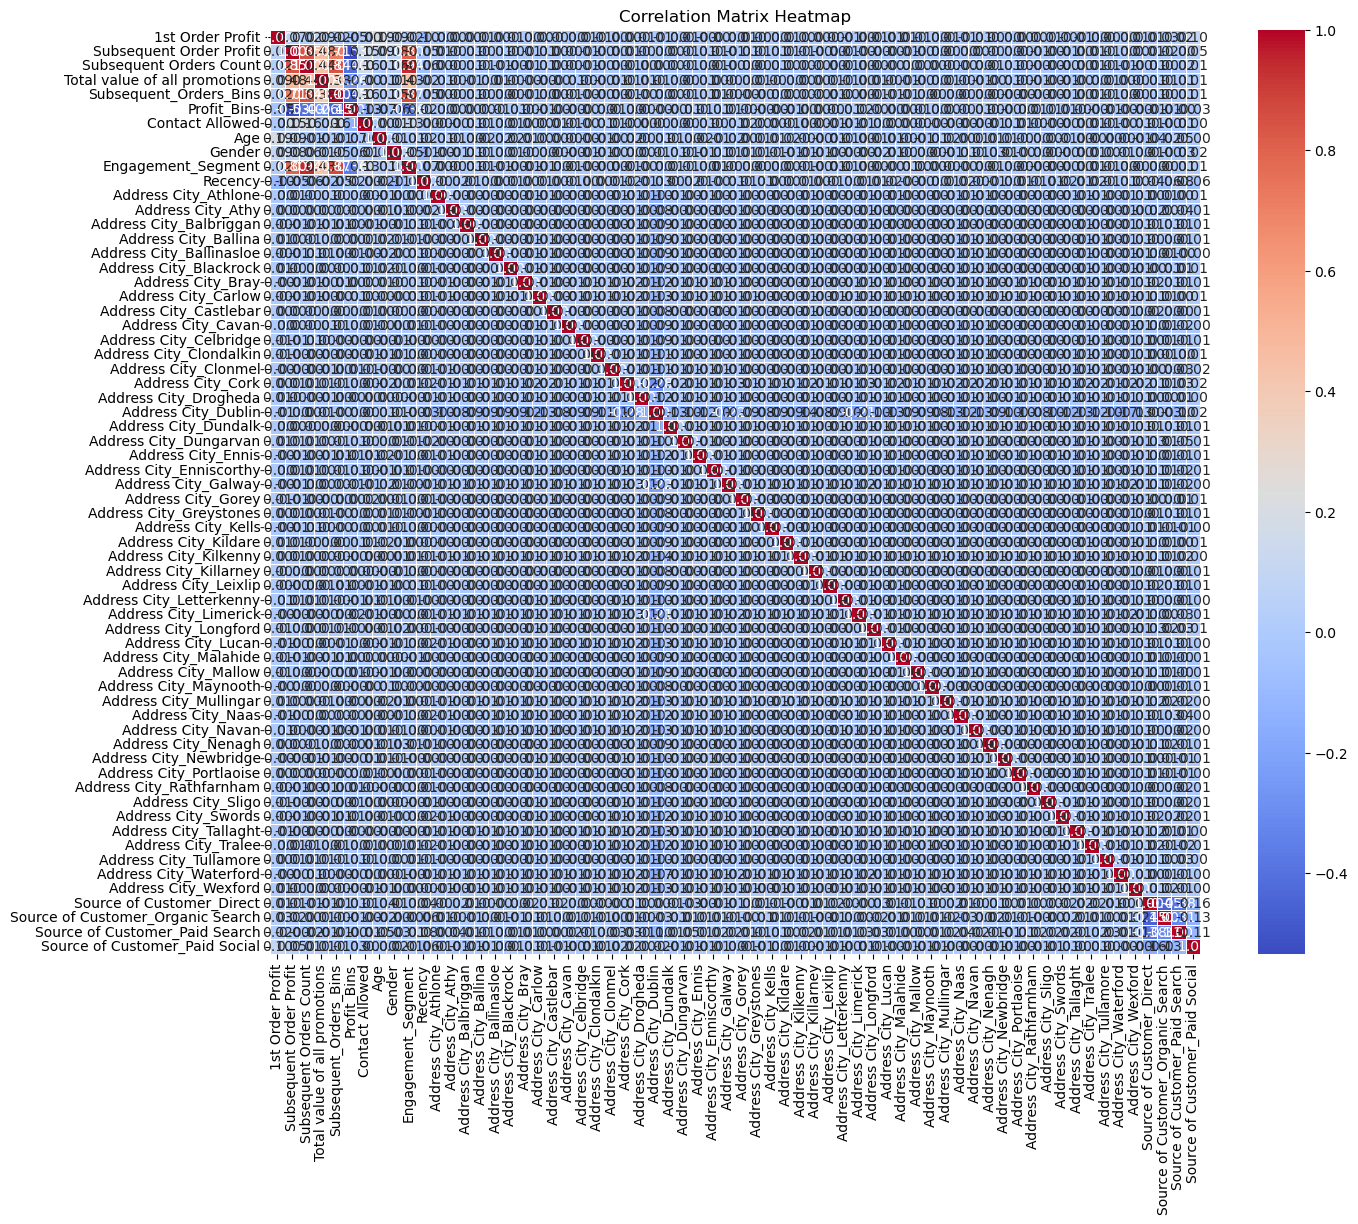

In [76]:
correlation_matrix = df_transformed.corr()

correlation_with_orders = correlation_matrix['Subsequent Orders Count'].sort_values(ascending=False)
print("Correlation with Subsequent Orders Count:")
print(correlation_with_orders)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
filename = "Correlation_Matrix_Heatmap.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')  
plt.show() # print correlation matrix for features in refined df 


Filtered Dublin Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 21160 entries, 1 to 30589
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   1st Order Profit                   21160 non-null  float64
 1   Subsequent Order Profit            21160 non-null  float64
 2   Subsequent Orders Count            21160 non-null  int64  
 3   Total value of all promotions      21160 non-null  float64
 4   Subsequent_Orders_Bins             21160 non-null  float64
 5   Profit_Bins                        21160 non-null  int32  
 6   Contact Allowed                    21160 non-null  int64  
 7   Age                                21160 non-null  int32  
 8   Gender                             21160 non-null  float64
 9   Engagement_Segment                 21160 non-null  int64  
 10  Recency                            21160 non-null  int64  
 11  Source of Customer_Direct        

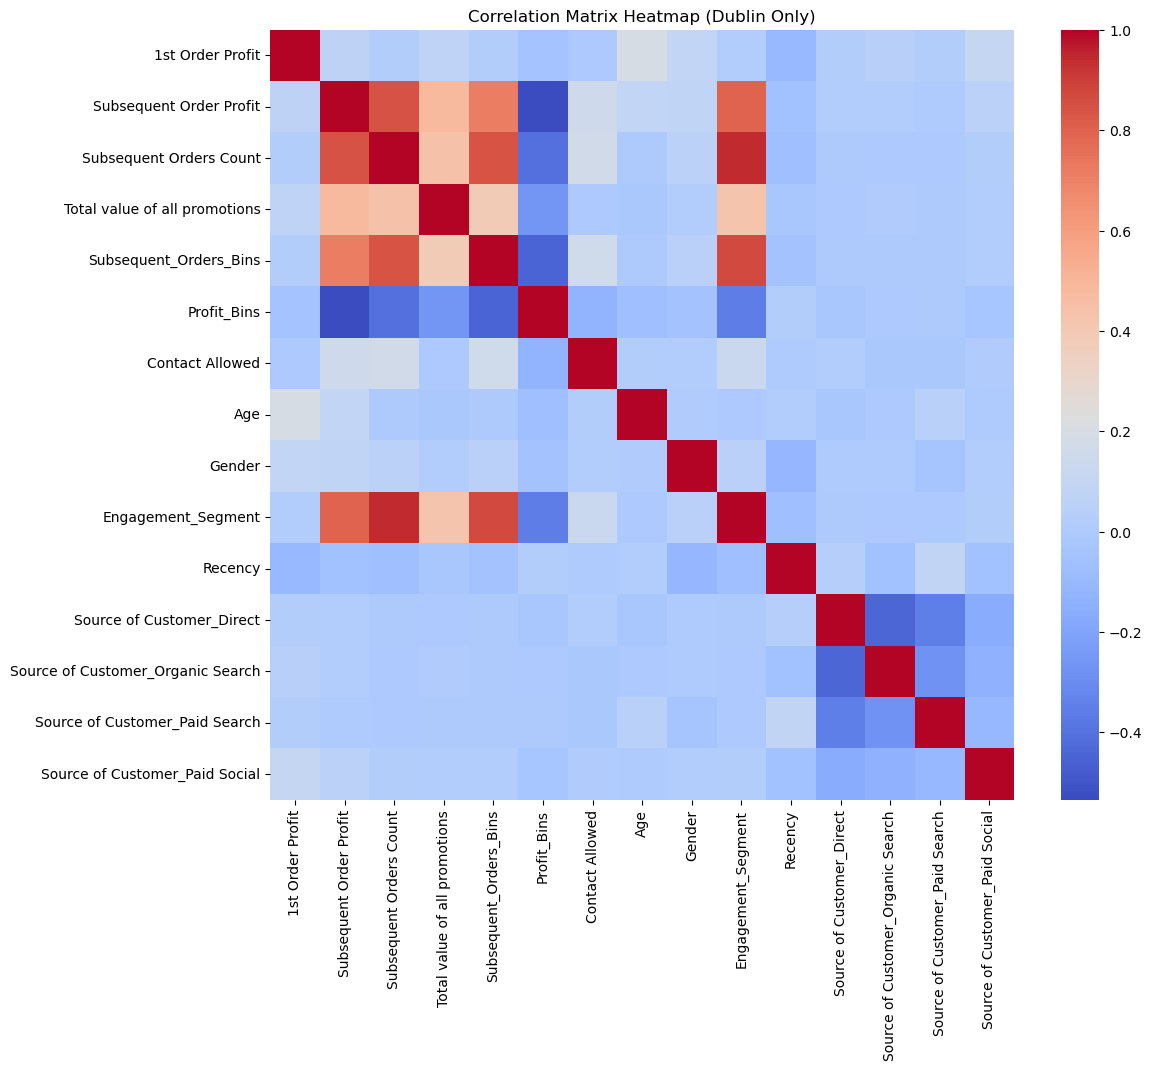

In [77]:
df_dublin = df_transformed[df_transformed['Address City_Dublin'] == 1].copy()

columns_to_drop = [col for col in df_dublin.columns if 'Address City_' in col]
df_dublin.drop(columns=columns_to_drop, inplace=True)

print("\nFiltered Dublin Dataset:")
print(df_dublin.info())

df_dublin.to_csv('dublin_customers.csv', index=False) # create new dataset only containing customers from in dublin

correlation_matrix_dublin = df_dublin.corr()
print("\nCorrelation Matrix (Dublin):")
print(correlation_matrix_dublin['Subsequent Orders Count'].sort_values(ascending=False))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_dublin, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap (Dublin Only)")
plt.savefig('Correlation_Matrix_Dublin.png', dpi=300, bbox_inches='tight')
plt.show() # print correlation matrix for features in dublin dataset

# Further Model Testing

In [79]:
print(df_transformed.columns) # print refined df contents

Index(['1st Order Profit', 'Subsequent Order Profit',
       'Subsequent Orders Count', 'Total value of all promotions',
       'Subsequent_Orders_Bins', 'Profit_Bins', 'Contact Allowed', 'Age',
       'Gender', 'Engagement_Segment', 'Recency', 'Address City_Athlone',
       'Address City_Athy', 'Address City_Balbriggan', 'Address City_Ballina',
       'Address City_Ballinasloe', 'Address City_Blackrock',
       'Address City_Bray', 'Address City_Carlow', 'Address City_Castlebar',
       'Address City_Cavan', 'Address City_Celbridge',
       'Address City_Clondalkin', 'Address City_Clonmel', 'Address City_Cork',
       'Address City_Drogheda', 'Address City_Dublin', 'Address City_Dundalk',
       'Address City_Dungarvan', 'Address City_Ennis',
       'Address City_Enniscorthy', 'Address City_Galway', 'Address City_Gorey',
       'Address City_Greystones', 'Address City_Kells', 'Address City_Kildare',
       'Address City_Kilkenny', 'Address City_Killarney',
       'Address City_Leixlip

Mean Squared Error (Dublin Model): 13.532162854442344
R² Score (Dublin Model): 0.2733533405657804


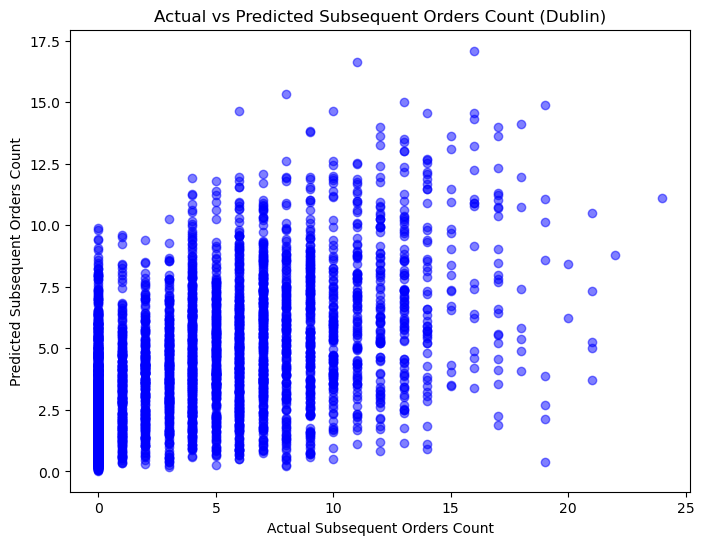

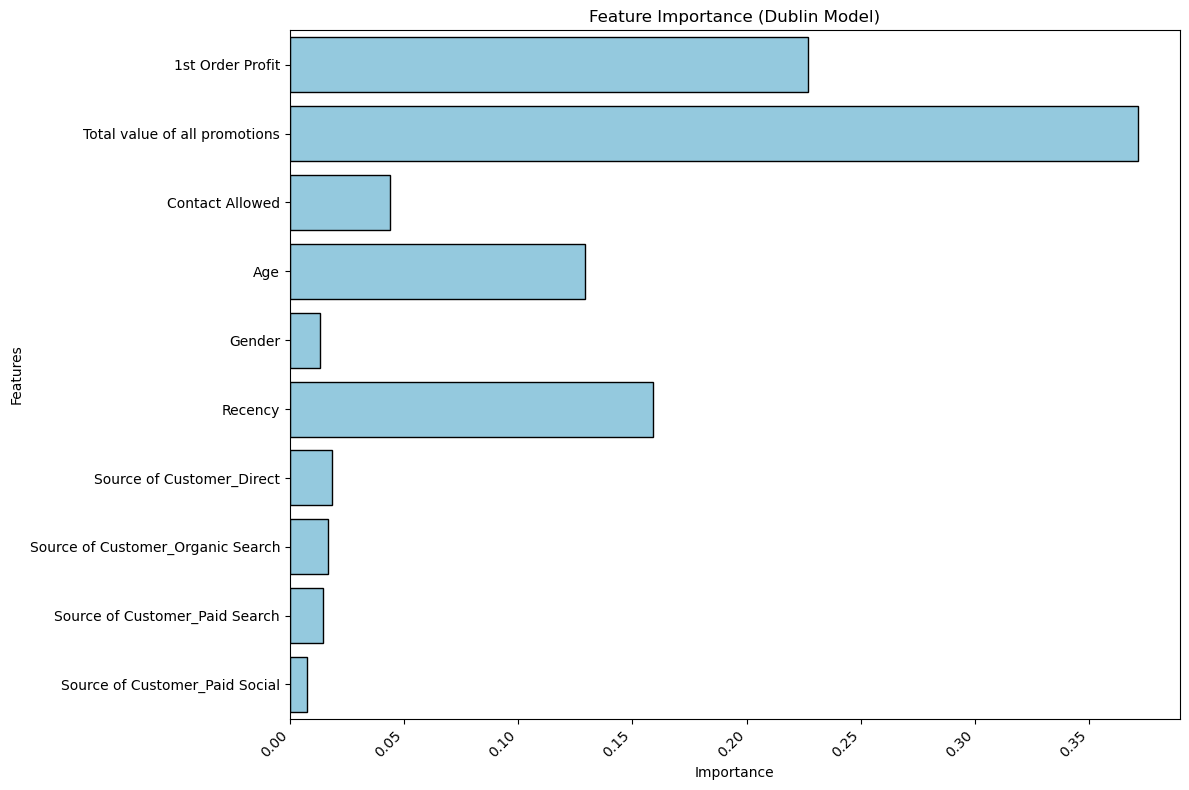

In [80]:
X_dublin = df_dublin.drop(columns=['Customer ID', 'Subsequent Orders Count', 'Engagement_Segment', 'Churn', 
                                   'Subsequent_Orders_Bins', 'Subsequent Order Profit', 'Profit_Bins'], errors='ignore')  
y_dublin = df_dublin['Subsequent Orders Count'] 

if 'Engagement_Segment' in X_dublin.columns:
    X_dublin['Engagement_Segment'] = X_dublin['Engagement_Segment'].astype('category').cat.codes

X_train_dublin, X_test_dublin, y_train_dublin, y_test_dublin = train_test_split(
    X_dublin, y_dublin, test_size=0.2, random_state=42
)

rf_model_dublin = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_dublin.fit(X_train_dublin, y_train_dublin)

y_pred_dublin = rf_model_dublin.predict(X_test_dublin)

mse_dublin = mean_squared_error(y_test_dublin, y_pred_dublin)
r2_dublin = r2_score(y_test_dublin, y_pred_dublin)

print("Mean Squared Error (Dublin Model):", mse_dublin)
print("R² Score (Dublin Model):", r2_dublin)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_dublin, y_pred_dublin, alpha=0.5, color='blue')
plt.xlabel("Actual Subsequent Orders Count")
plt.ylabel("Predicted Subsequent Orders Count")
plt.title("Actual vs Predicted Subsequent Orders Count (Dublin)")
plt.savefig("Predictions_vs_Actual_Dublin.png", dpi=300, bbox_inches='tight')
plt.show()

feature_importances = rf_model_dublin.feature_importances_
features_dublin = X_dublin.columns

plt.figure(figsize=(12, 8)) 
sns.barplot(x=feature_importances, y=features_dublin, color='skyblue', edgecolor='black')  
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Dublin Model)")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.savefig("Feature_Importance_Dublin_Improved.png", dpi=300, bbox_inches='tight')  
plt.show() # build model to predict subsequent orders for customers in dublin (model ineffective but shows trend in feature importance)

Mean Squared Error (Refined Model for Order Profit): 1601.874886169061
R² Score (Refined Model for Order Profit): 0.2755454869525904


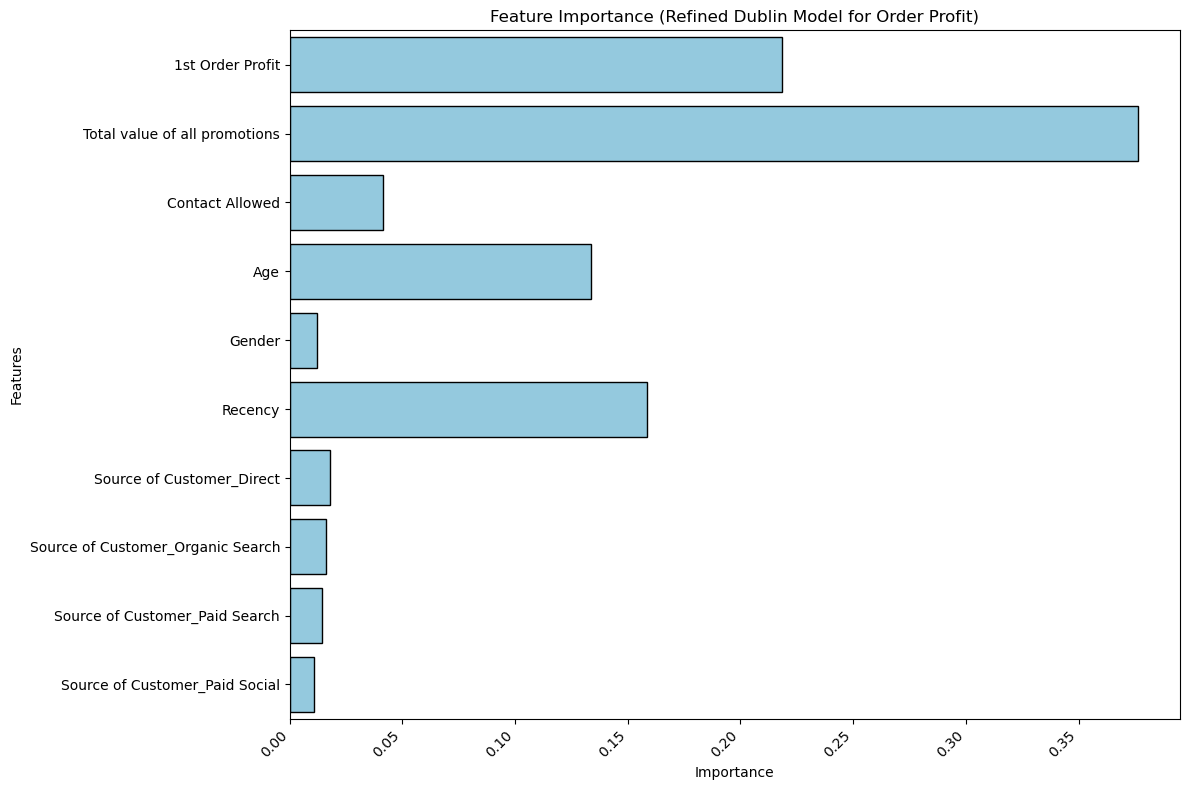

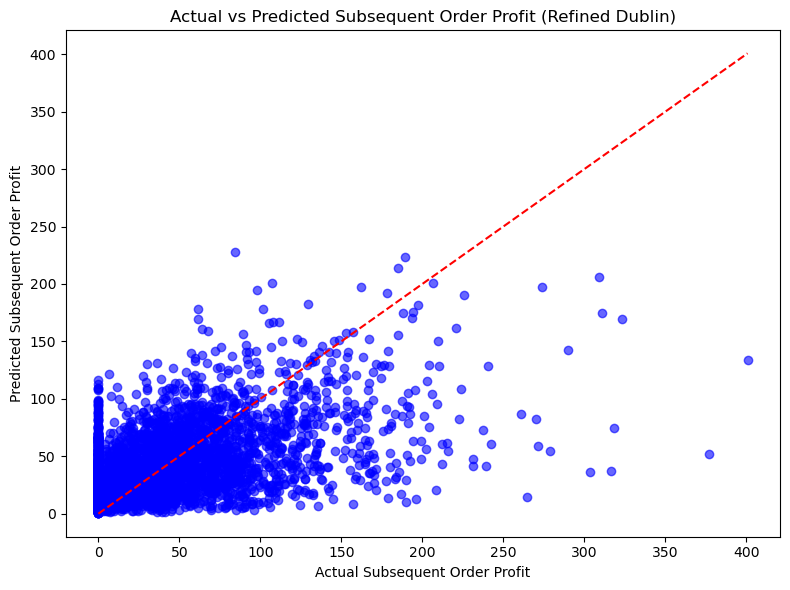

In [81]:
X_dublin_refined = df_dublin.drop(columns=['Customer ID', 'Subsequent Order Profit', 'Engagement_Segment', 
                                           'Subsequent_Orders_Bins', 'Profit_Bins', 'Subsequent Orders Count'], errors='ignore')
y_dublin_refined = df_dublin['Subsequent Order Profit'] 

X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(
    X_dublin_refined, y_dublin_refined, test_size=0.2, random_state=42
)

rf_model_refined = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_refined.fit(X_train_refined, y_train_refined)

y_pred_refined = rf_model_refined.predict(X_test_refined)

mse_refined = mean_squared_error(y_test_refined, y_pred_refined)
r2_refined = r2_score(y_test_refined, y_pred_refined)

print(f"Mean Squared Error (Refined Model for Order Profit): {mse_refined}")
print(f"R² Score (Refined Model for Order Profit): {r2_refined}")

feature_importances_refined = rf_model_refined.feature_importances_
feature_names_refined = X_dublin_refined.columns

plt.figure(figsize=(12, 8)) 
sns.barplot(x=feature_importances_refined, y=feature_names_refined, color='skyblue', edgecolor='black')  
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Refined Dublin Model for Order Profit)")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.savefig("Feature_Importance_Refined_Order_Profit.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_refined, y_pred_refined, alpha=0.6, color="blue")
plt.plot([0, max(y_test_refined)], [0, max(y_test_refined)], color='red', linestyle='--')
plt.title("Actual vs Predicted Subsequent Order Profit (Refined Dublin)")
plt.xlabel("Actual Subsequent Order Profit")
plt.ylabel("Predicted Subsequent Order Profit")
plt.tight_layout()
plt.savefig("Predictions_vs_Actual_Refined_Order_Profit.png", dpi=300, bbox_inches='tight')
plt.show() # building model for predicting subsequent order profit (still ineffective, however trends can be seen from feature importance)

Mean Squared Error (Refined Order Count Model): 3.8516313208884694
R² Score (Refined Order Count Model): 0.7931760751920722


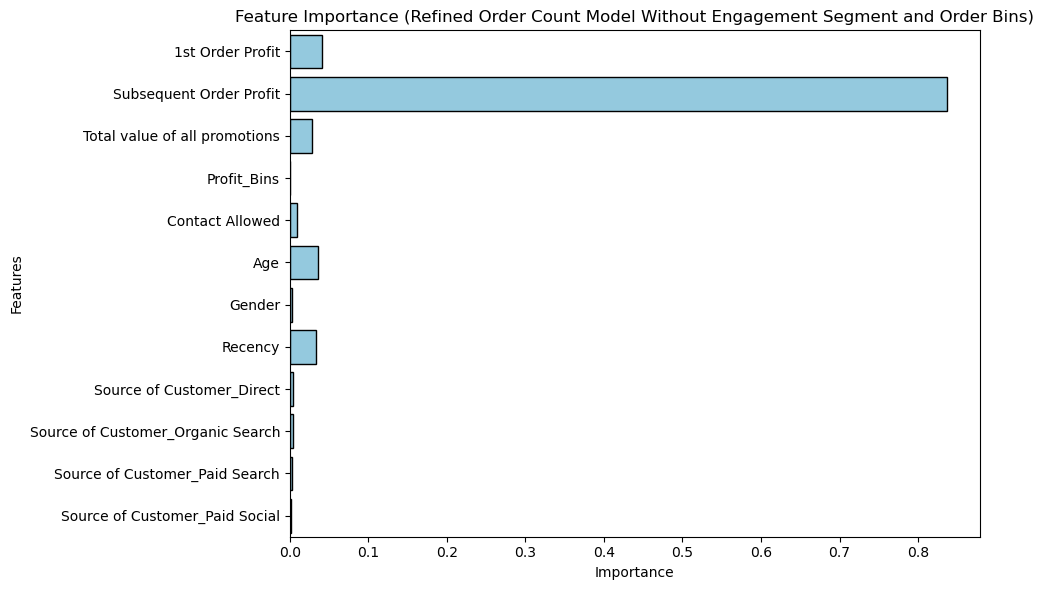

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X_dublin_order_count = df_dublin.drop(columns=[
    "Subsequent Orders Count", "Engagement_Segment", "Subsequent_Orders_Bins",
    "Customer ID", "Churn", 
    "Recency_group_At Risk", "Recency_group_Churned",
    "Recency Group_Low Engagement", "Recency Group_Moderate Engagement", 
    "Recency Group_High Engagement"
], errors="ignore")  

y_dublin_order_count = df_dublin["Subsequent Orders Count"]

X_train_order_count_refined, X_test_order_count_refined, y_train_order_count_refined, y_test_order_count_refined = train_test_split(
    X_dublin_order_count, y_dublin_order_count, test_size=0.2, random_state=42
)

rf_model_order_count_refined = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model_order_count_refined.fit(X_train_order_count_refined, y_train_order_count_refined)

y_pred_order_count_refined = rf_model_order_count_refined.predict(X_test_order_count_refined)
mse_order_count_refined = mean_squared_error(y_test_order_count_refined, y_pred_order_count_refined)
r2_order_count_refined = r2_score(y_test_order_count_refined, y_pred_order_count_refined)

print(f"Mean Squared Error (Refined Order Count Model): {mse_order_count_refined}")
print(f"R² Score (Refined Order Count Model): {r2_order_count_refined}")

feature_importances_order_count_refined = rf_model_order_count_refined.feature_importances_
refined_features = X_dublin_order_count.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_order_count_refined, y=refined_features, color="skyblue", edgecolor="black")
plt.title("Feature Importance (Refined Order Count Model Without Engagement Segment and Order Bins)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("Feature_Importance_Order_Count_Refined_No_Engagement_Bins.png", dpi=300, bbox_inches='tight')
plt.show() # further model testing (inclusion of subsequent order profit warps results)

In [83]:
rf_model_refined = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

rf_model_refined.fit(X_train_refined, y_train_refined) # build random forest model

RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200, random_state=42)

In [84]:
unseen_data = pd.DataFrame({
    '1st Order Profit': np.random.uniform(5, 20, size=500),
    'Subsequent Order Profit': np.random.uniform(10, 100, size=500),
    'Total value of all promotions': np.random.uniform(1, 15, size=500),
    'Contact Allowed': np.random.choice([0, 1], size=500),
    'Age': np.random.randint(18, 70, size=500),
    'Gender': np.random.choice([0, 1], size=500),
    'Recency': np.random.randint(0, 365, size=500),
    'Source of Customer_Direct': np.random.choice([0, 1], size=500),
    'Source of Customer_Organic Search': np.random.choice([0, 1], size=500),
    'Source of Customer_Paid Search': np.random.choice([0, 1], size=500),
    'Source of Customer_Paid Social': np.random.choice([0, 1], size=500)
})

file_path = "unseen_data_dublin.csv"
unseen_data.to_csv(file_path, index=False)
print(f"Unseen data saved as {file_path}") # create synthetic data for testing models

Unseen data saved as unseen_data_dublin.csv


Mean Squared Error (Refined Model for Order Profit): 1601.874886169061
R² Score (Refined Model for Order Profit): 0.2755454869525904


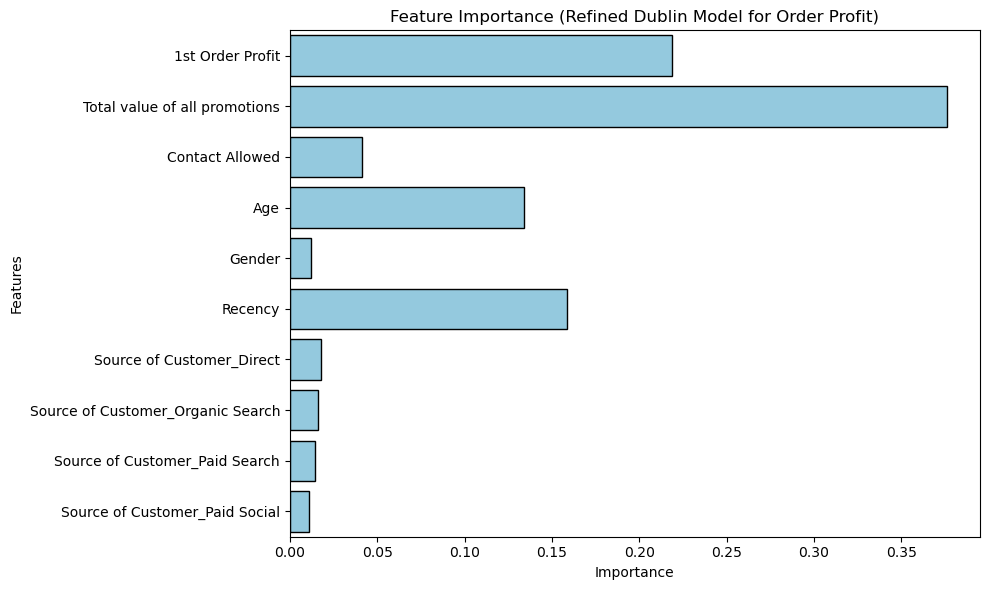

In [85]:
X_dublin_refined_profit = df_dublin.drop(columns=['Subsequent Order Profit', 'Subsequent Orders Count', 
                                                  'Engagement_Segment', 'Subsequent_Orders_Bins', 'Profit_Bins'])
y_dublin_refined_profit = df_dublin['Subsequent Order Profit']  # This is your target variable

X_train_refined_profit, X_test_refined_profit, y_train_refined_profit, y_test_refined_profit = train_test_split(
    X_dublin_refined_profit, y_dublin_refined_profit, test_size=0.2, random_state=42
)

rf_model_refined_profit = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_refined_profit.fit(X_train_refined_profit, y_train_refined_profit)

y_pred_refined_profit = rf_model_refined_profit.predict(X_test_refined_profit)

mse_refined_profit = mean_squared_error(y_test_refined_profit, y_pred_refined_profit)
r2_refined_profit = r2_score(y_test_refined_profit, y_pred_refined_profit)

print(f"Mean Squared Error (Refined Model for Order Profit): {mse_refined_profit}")
print(f"R² Score (Refined Model for Order Profit): {r2_refined_profit}")

feature_importances_refined_profit = rf_model_refined_profit.feature_importances_
feature_names_refined_profit = X_dublin_refined_profit.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_refined_profit, y=feature_names_refined_profit, color="skyblue", edgecolor="black")
plt.title("Feature Importance (Refined Dublin Model for Order Profit)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("Feature_Importance_Refined_Profit.png", dpi=300, bbox_inches='tight')
plt.show() # further model testing shows total value of promotions, 1st order profit, age, subscription recency and contact allowed (y/n) contribute to predictions 

In [86]:
print(df_dublin.columns)

Index(['1st Order Profit', 'Subsequent Order Profit',
       'Subsequent Orders Count', 'Total value of all promotions',
       'Subsequent_Orders_Bins', 'Profit_Bins', 'Contact Allowed', 'Age',
       'Gender', 'Engagement_Segment', 'Recency', 'Source of Customer_Direct',
       'Source of Customer_Organic Search', 'Source of Customer_Paid Search',
       'Source of Customer_Paid Social'],
      dtype='object')


Mean Squared Error (No Features Model): 12.41693039407837
R² Score (No Features Model): 0.33323881124277976


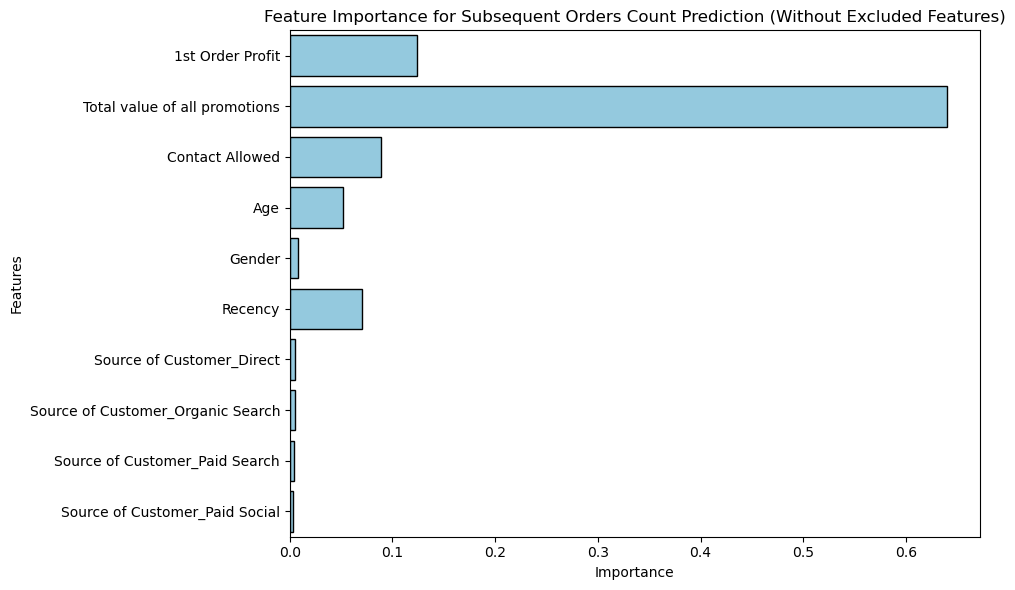

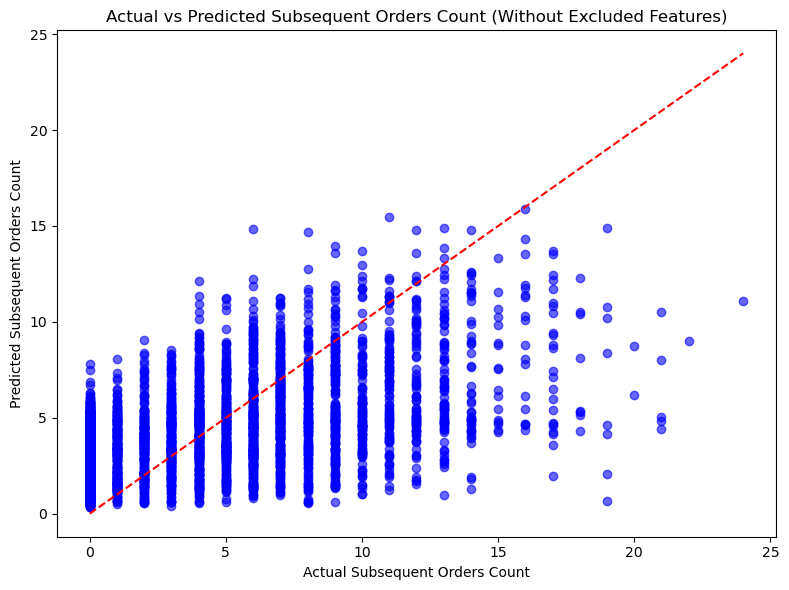

In [87]:
df_dublin_refined_no_features = df_dublin.drop(columns=['Subsequent Order Profit', 'Engagement_Segment', 
                                                        'Subsequent_Orders_Bins', 'Profit_Bins'], errors='ignore')

X_no_features = df_dublin_refined_no_features.drop(columns=['Subsequent Orders Count'])
y_no_features = df_dublin['Subsequent Orders Count']  

X_train_no_features, X_test_no_features, y_train_no_features, y_test_no_features = train_test_split(
    X_no_features, y_no_features, test_size=0.2, random_state=42
)

rf_model_no_features = RandomForestRegressor(n_estimators=200, min_samples_split=10, 
                                             min_samples_leaf=2, max_features=None, max_depth=10, random_state=42)

rf_model_no_features.fit(X_train_no_features, y_train_no_features)

y_pred_no_features = rf_model_no_features.predict(X_test_no_features)

mse_no_features = mean_squared_error(y_test_no_features, y_pred_no_features)
r2_no_features = r2_score(y_test_no_features, y_pred_no_features)

print(f"Mean Squared Error (No Features Model): {mse_no_features}")
print(f"R² Score (No Features Model): {r2_no_features}")

feature_importances_no_features = rf_model_no_features.feature_importances_
feature_names_no_features = X_no_features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_no_features, y=feature_names_no_features, color="skyblue", edgecolor="black")
plt.title("Feature Importance for Subsequent Orders Count Prediction (Without Excluded Features)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("Feature_Importance_No_Features.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_no_features, y_pred_no_features, alpha=0.6, color="blue")
plt.plot([0, max(y_test_no_features)], [0, max(y_test_no_features)], color='red', linestyle='--')
plt.title("Actual vs Predicted Subsequent Orders Count (Without Excluded Features)")
plt.xlabel("Actual Subsequent Orders Count")
plt.ylabel("Predicted Subsequent Orders Count")
plt.tight_layout()
plt.savefig("Predictions_vs_Actual_No_Features.png", dpi=300, bbox_inches='tight')
plt.show() # building model for predicting subsequent order count (infeffective but again shows value of promotions is an important frature)

Mean Squared Error (No Features Model): 12.41693039407837
R² Score (No Features Model): 0.33323881124277976


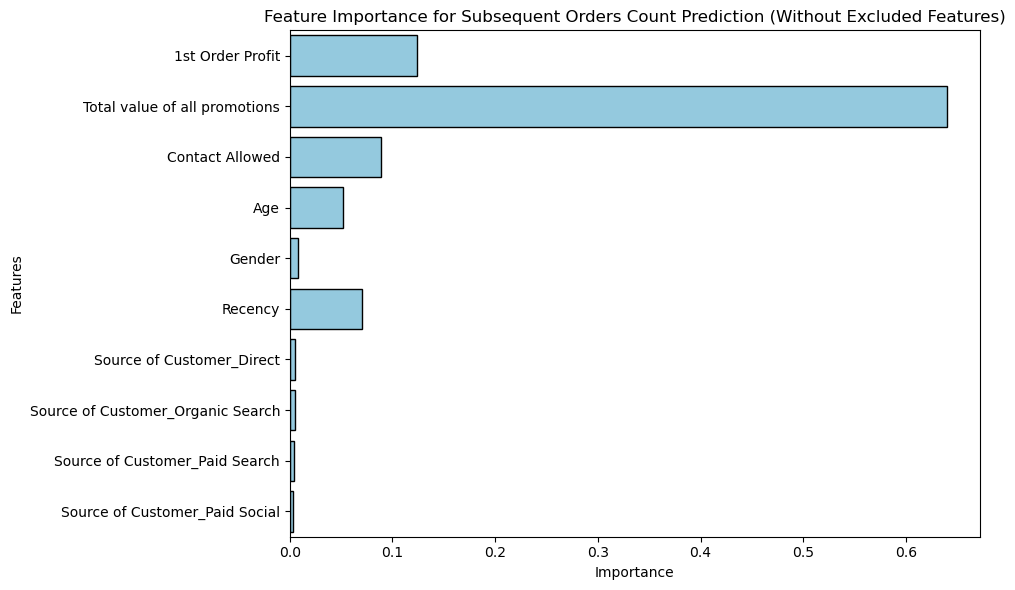

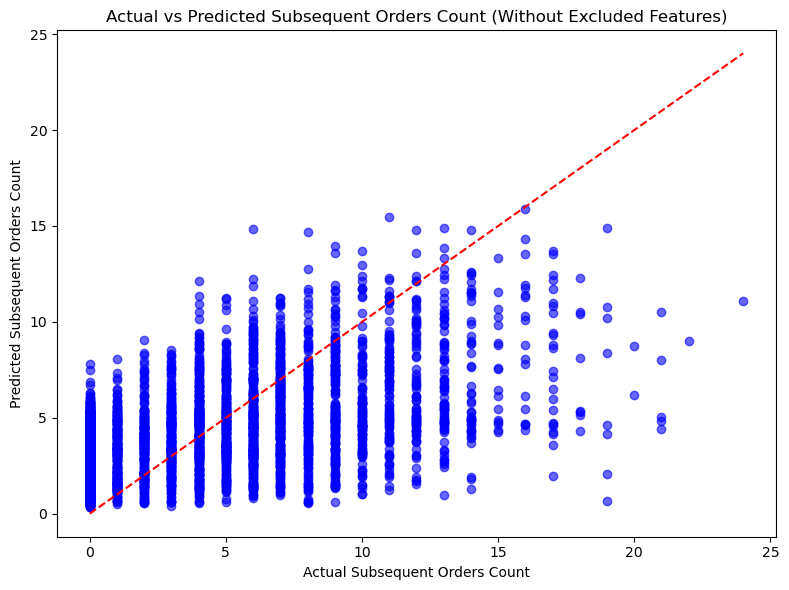

In [88]:
df_dublin_refined_no_features = df_dublin.drop(columns=['Subsequent Order Profit', 'Engagement_Segment', 
                                                        'Subsequent_Orders_Bins', 'Profit_Bins'])

X_no_features = df_dublin_refined_no_features.drop(columns=['Subsequent Orders Count']) 
y_no_features = df_dublin['Subsequent Orders Count']  

# Train-test split
X_train_no_features, X_test_no_features, y_train_no_features, y_test_no_features = train_test_split(
    X_no_features, y_no_features, test_size=0.2, random_state=42
)

rf_model_no_features = RandomForestRegressor(n_estimators=200, min_samples_split=10, 
                                             min_samples_leaf=2, max_features=None, max_depth=10, random_state=42)

rf_model_no_features.fit(X_train_no_features, y_train_no_features)

y_pred_no_features = rf_model_no_features.predict(X_test_no_features)

mse_no_features = mean_squared_error(y_test_no_features, y_pred_no_features)
r2_no_features = r2_score(y_test_no_features, y_pred_no_features)

print(f"Mean Squared Error (No Features Model): {mse_no_features}")
print(f"R² Score (No Features Model): {r2_no_features}")

feature_importances_no_features = rf_model_no_features.feature_importances_
feature_names_no_features = X_no_features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_no_features, y=feature_names_no_features, color="skyblue", edgecolor="black")
plt.title("Feature Importance for Subsequent Orders Count Prediction (Without Excluded Features)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("Feature_Importance_No_Features.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_no_features, y_pred_no_features, alpha=0.6, color="blue")
plt.plot([0, max(y_test_no_features)], [0, max(y_test_no_features)], color='red', linestyle='--')
plt.title("Actual vs Predicted Subsequent Orders Count (Without Excluded Features)")
plt.xlabel("Actual Subsequent Orders Count")
plt.ylabel("Predicted Subsequent Orders Count")
plt.tight_layout()
plt.savefig("Predictions_vs_Actual_No_Features.png", dpi=300, bbox_inches='tight')
plt.show() # further model testing

In [89]:
df_dublin = df_dublin.merge(merged_df[['Customer ID']], left_index=True, right_index=True, how='left')

print(df_dublin[['Customer ID']].head()) # confirm customer id is matched and included for time series analysis

   Customer ID
1            2
2            3
3            4
5            6
6            7


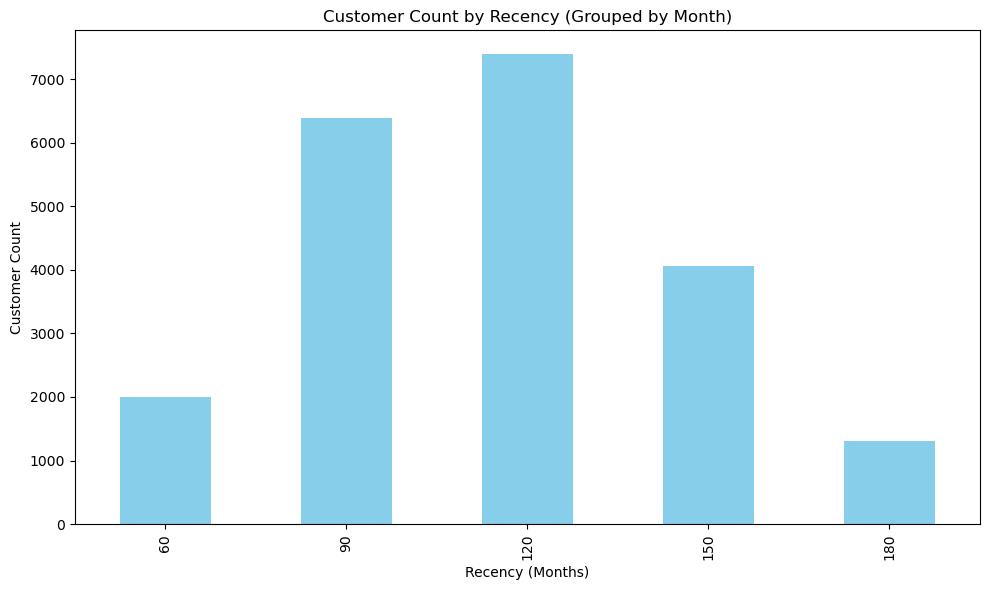

In [90]:
df_dublin['Recency_month'] = (df_dublin['Recency'] // 30) * 30  

df_dublin['Recency_week'] = (df_dublin['Recency'] // 7) * 7  

plt.figure(figsize=(10, 6))
df_dublin.groupby('Recency_month')['Customer ID'].count().plot(kind='bar', color='skyblue')
plt.title("Customer Count by Recency (Grouped by Month)")
plt.xlabel("Recency (Months)")
plt.ylabel("Customer Count")
plt.savefig('Customer_Count_by_Recency.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show() # visualize customer count by subscription recency 